In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

%config InlineBackend.figure_formats = ['svg']

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
plt.rcParams['legend.numpoints'] = 1
from sklearn.model_selection import train_test_split

In [165]:
_new_black = '#373737'
plt_rc_params={
    #'font.family': 'sans-serif',
    #'font.sans-serif': ['Arial', 'DejaVu Sans'],
    'svg.fonttype': 'none',
    'text.usetex': False,
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    # 'font.size': 9,
    # 'axes.labelsize': 9,
    # 'axes.titlesize': 9,
    # 'axes.labelpad': 2,
    # 'axes.linewidth': 0.5,
    # 'axes.titlepad': 4,
    # 'lines.linewidth': 0.5,
    # 'legend.fontsize': 9,
    # 'legend.title_fontsize': 9,
    # 'xtick.labelsize': 9,
    # 'ytick.labelsize': 9,
    # 'xtick.major.size': 2,
    # 'xtick.major.pad': 1,
    # 'xtick.major.width': 0.5,
    # 'ytick.major.size': 2,
    # 'ytick.major.pad': 1,
    # 'ytick.major.width': 0.5,
    # 'xtick.minor.size': 2,
    # 'xtick.minor.pad': 1,
    # 'xtick.minor.width': 0.5,
    # 'ytick.minor.size': 2,
    # 'ytick.minor.pad': 1,
    # 'ytick.minor.width': 0.5,

    # Avoid black unless necessary
    'text.color': _new_black,
    'patch.edgecolor': _new_black,
    'patch.force_edgecolor': False, # Seaborn turns on edgecolors for histograms by default and I don't like it
    'hatch.color': _new_black,
    'axes.edgecolor': _new_black,
    # 'axes.titlecolor': _new_black # should fallback to text.color
    'axes.labelcolor': _new_black,
    'xtick.color': _new_black,
    'ytick.color': _new_black

    # Default colormap - personal preference
    # 'image.cmap': 'inferno'
}
sns.set_style('white', rc=plt_rc_params)


In [3]:
from statannotations.Annotator import Annotator

In [4]:
HCOLOR_dark = '#A67B5B'
HCOLOR = '#ECB176'
HCOLOR_light = '#803D3B'

PCOLOR_dark = '#006769'
PCOLOR = '#40A578'
PCOLOR_light = '#9DDE8B'


In [5]:
# fg -> umol 14 (N mulecular weight) * 1e-9 (fmol -> umol)
# switch to C biomass
Qp = 12.5  * 1e-9 / 14
Qh = 40 * 1e-9 / 14

Qp

8.92857142857143e-10

In [6]:
import statsmodels.api as sm

In [7]:
%load_ext autoreload
%autoreload 2
#import CCPA_lib as cp

In [8]:
horder = ['Axenic', 'HOT1A3', 'HP15', 'Pgall', 'CIP', 'DSS-3', 'nitzsch',
       'mit0604', 'k-12', 'HOT5_F3', 'HOT5_C3']


In [9]:
os.listdir('data')

['10cc FACS results.xlsx',
 'Growth curves A-D Yara.xlsx',
 '10cc metadata.xlsx',
 'Yara_pro99_axenic.xlsx',
 '10cc_FCM_MPN_results.xlsx',
 '10cc FL.xlsx',
 'CCPA.pkl.gz']

In [10]:
#data = pd.read_excel(os.path.join('data', 'Osnat_20CC_het_select.xlsx'), 
#              index_col='date', sheet_name='FL').T.reset_index(drop=True)
data_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='FL0').T.reset_index(drop=True)
data1_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='FL1').T.reset_index(drop=True)
data4_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='FL2').T.reset_index(drop=True)
data5_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='FL3').T.reset_index(drop=True)
data6_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='FL4').T.reset_index(drop=True)
data7_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='FL5').T.reset_index(drop=True)

In [11]:
pro99_df = pd.read_excel(os.path.join('data', 'Yara_pro99_axenic.xlsx',))

In [12]:
pro99_df.columns

Index(['Date', 'Day', 'Pro99_axenicA', 'Pro99_axenicB', 'Pro99_axenicC'], dtype='object')

In [13]:
pro99_mdf = pro99_df.melt(id_vars=['Date', 'Day'], value_name='FL', var_name='Sample', )

In [14]:
#data = pd.read_excel(os.path.join('data', 'Osnat_20CC_het_select.xlsx'), 
#              index_col='date', sheet_name='FL').T.reset_index(drop=True)
data2_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='3FL transfer0').T.reset_index(drop=True)

In [15]:
#data = pd.read_excel(os.path.join('data', 'Osnat_20CC_het_select.xlsx'), 
#              index_col='date', sheet_name='FL').T.reset_index(drop=True)
data3_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='3FL transfer 1').T.reset_index(drop=True)

In [16]:
meta_df = pd.read_excel(os.path.join('data', '10cc metadata.xlsx'), 
               sheet_name='metadata') #.T.reset_index(drop=True)
meta2_df = pd.read_excel(os.path.join('data', '10cc metadata.xlsx'), 
               sheet_name='metadata2') #.T.reset_index(drop=True)

In [17]:
mpn_df = pd.read_excel(os.path.join('data', '10cc_FCM_MPN_results.xlsx',))


In [18]:
os.listdir('data')

['10cc FACS results.xlsx',
 'Growth curves A-D Yara.xlsx',
 '10cc metadata.xlsx',
 'Yara_pro99_axenic.xlsx',
 '10cc_FCM_MPN_results.xlsx',
 '10cc FL.xlsx',
 'CCPA.pkl.gz']

In [19]:
 fcm_df = pd.read_excel(os.path.join('data', '10cc FACS results.xlsx'))
 fcm_df

,Unnamed: 0,tube,Sample,id,replicate,transfer,dilution,sybr,problematic,flow,heterotroph,full name,date,transfer day,med4,het,med4 | Count,med4 beads | Count,het | Count
0,0,specimen_1_CC_001+sybr_Tube_002_032.fcs,1A1,1,A,1.0,100.0,sybr,NaN,0.15690,Axenic,Axenic,2021-05-12 11:49:00,19.817361,NaN,NaN,NaN,NaN,NaN
1,1,specimen_1_CC_001+sybr_Tube_003_033.fcs,1B1,1,B,1.0,100.0,sybr,NaN,0.15690,Axenic,Axenic,2021-05-12 11:49:00,19.817361,NaN,NaN,NaN,NaN,NaN
2,2,specimen_1_CC_001+sybr_Tube_004_034.fcs,1C1,1,C,1.0,100.0,sybr,NaN,0.15690,Axenic,Axenic,2021-05-12 11:49:00,19.817361,NaN,NaN,NaN,NaN,NaN
3,4,specimen_1_CC_001+sybr_Tube_006_036.fcs,2B1,2,B,1.0,100.0,sybr,NaN,0.15690,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,NaN,NaN,NaN,NaN,NaN
4,5,specimen_1_CC_001+sybr_Tube_007_037.fcs,2C1,2,C,1.0,100.0,sybr,NaN,0.15690,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,485,specimen_3_CC+sybr_Tube_032_190.fcs,9C5,9,C,5.0,100.0,sybr,NaN,0.12555,k-12,E. coli,2021-08-29 15:49:00,128.984028,NaN,NaN,NaN,NaN,5.0
467,486,specimen_3_CC+sybr_Tube_033_191.fcs,10C5,10,C,5.0,100.0,sybr,NaN,0.12555,HOT5_F3,Marinovum 5F3,2021-08-29 15:49:00,128.984028,NaN,4.488252e+06,NaN,NaN,5635.0
468,487,specimen_3_CC+sybr_Tube_034_192.fcs,11C5,11,C,5.0,100.0,sybr,NaN,0.12555,HOT5_C3,Roseovarius 5C3,2021-08-29 15:49:00,128.984028,NaN,1.673437e+06,NaN,NaN,2101.0
469,488,Mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,37479.0


In [20]:
fcm_df.columns

Index(['Unnamed: 0', 'tube', 'Sample', 'id', 'replicate', 'transfer',
       'dilution', 'sybr', 'problematic', 'flow', 'heterotroph', 'full name',
       'date', 'transfer day', 'med4', 'het', 'med4 | Count',
       'med4 beads | Count', 'het | Count'],
      dtype='object')

In [21]:
fcm_mdf= fcm_df.loc[fcm_df.problematic != 'yes'].melt(
    id_vars=['tube', 'Sample', 'id', 'replicate', 'transfer',
        'heterotroph', 'full name',
       'date', 'transfer day',],
    value_vars=['med4', 'het',],)


In [22]:
fcm_mdf = fcm_mdf.dropna(subset=['value'])

In [23]:
mdf1 = pd.melt(data_df, id_vars='day', var_name='Sample', value_name='FL')
mdf11= pd.melt(data1_df, id_vars='day', var_name='Sample', value_name='FL')
mdf2 = pd.melt(data2_df, id_vars='day', var_name='Sample', value_name='FL')
mdf3 = pd.melt(data3_df, id_vars='day', var_name='Sample', value_name='FL')
mdf4 = pd.melt(data4_df, id_vars='day', var_name='Sample', value_name='FL')
mdf5 = pd.melt(data5_df, id_vars='day', var_name='Sample', value_name='FL')
mdf6 = pd.melt(data6_df, id_vars='day', var_name='Sample', value_name='FL')
mdf7 = pd.melt(data7_df, id_vars='day', var_name='Sample', value_name='FL')


In [24]:
mdf = pd.concat([mdf1, mdf11, mdf2, mdf3, mdf4, mdf5, mdf6, mdf7])

In [25]:
mdf.head()

,day,Sample,FL
0,0.000000,1A0,0.122
1,1.081944,1A0,0.034
2,2.164583,1A0,0.159
3,2.747222,1A0,0.227
4,3.754167,1A0,0.306


In [26]:
mdf['id'] = pd.to_numeric(mdf.Sample.str.slice(start=0, stop=-2))
mdf['replicate'] = mdf.Sample.str.slice(start=-2, stop=-1)
mdf['transfer'] = pd.to_numeric(mdf.Sample.str.slice(start=-1))


In [27]:
mdf = pd.merge(mdf, meta_df, on='id', how='left')
mdf = pd.merge(mdf, meta2_df, on='transfer', how='left')


In [28]:
mdf.columns

Index(['day', 'Sample', 'FL', 'id', 'replicate', 'transfer', 'heterotroph',
       'full name', 'date', 'transfer day'],
      dtype='object')

In [29]:
d2 = mdf.loc[mdf['full name'].isin(['Axenic'])].copy()
d2['full name'] = 'Axenic2'
d3 = mdf.loc[mdf['full name'].isin(['Axenic'])].copy()
d3['full name'] = 'Axenic3'
d4 = mdf.loc[mdf['full name'].isin(['Axenic'])].copy()
d4['full name'] = 'Axenic4'



In [30]:
mdf['full name'].unique()

array(['Axenic', 'A. macleodii 1A3', 'Marinobacter adhaerens HP15',
       'Phaeobacter gallaeciensis', 'Pseudoalteromonas haloplanktis',
       'Ruegeria pomeroyi', 'Sulfitobacter pseudonitzschiae',
       'Prochlorococcus mit0604', 'E. coli', 'Marinovum 5F3',
       'Roseovarius 5C3'], dtype=object)

In [31]:
mdf

,day,Sample,FL,id,replicate,transfer,heterotroph,full name,date,transfer day
0,0.000000,1A0,0.122,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000
1,1.081944,1A0,0.034,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000
2,2.164583,1A0,0.159,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000
3,2.747222,1A0,0.227,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000
4,3.754167,1A0,0.306,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000
...,...,...,...,...,...,...,...,...,...,...
9628,48.937500,11C5,0.019,11,C,5,HOT5_C3,Roseovarius 5C3,2021-08-29 15:49:00,128.984028
9629,51.813194,11C5,0.028,11,C,5,HOT5_C3,Roseovarius 5C3,2021-08-29 15:49:00,128.984028
9630,52.784028,11C5,0.058,11,C,5,HOT5_C3,Roseovarius 5C3,2021-08-29 15:49:00,128.984028
9631,59.947917,11C5,0.033,11,C,5,HOT5_C3,Roseovarius 5C3,2021-08-29 15:49:00,128.984028


In [32]:
axenic = ['Axenic']

group1 = ['A. macleodii 1A3', 'Pseudoalteromonas haloplanktis',]

group2 = ['Sulfitobacter pseudonitzschiae','Ruegeria pomeroyi', ]
group3 = [ #'Prochlorococcus mit0604',
  #  'E. coli',
         'Marinovum 5F3','Roseovarius 5C3']
group4 = [ 
       'Marinobacter adhaerens HP15',
       'Phaeobacter gallaeciensis', ]

mdf.loc[mdf['full name'].isin(axenic), 'Group'] = 'Axenic'
mdf.loc[mdf['full name'].isin(group1), 'Group'] = 'Strong'
mdf.loc[mdf['full name'].isin(group2), 'Group'] = 'Sustained'
mdf.loc[mdf['full name'].isin(group3), 'Group'] = 'Weak'
mdf.loc[mdf['full name'].isin(group4), 'Group'] = 'Inhibited'

horder =  group1 + group2 + group3 + group4 + ['Axenic']
# ['Axenic', 'HOT1A3',  'CIP',  'nitzsch', 'mit0604',
#           'DSS-3','k-12','HOT5_F3', 'HOT5_C3'
#           'HP15', 'Pgall',
#          ]
gorder = ['Sustained', 'Strong', 'Weak', 'Inhibited',   'Axenic',  ]
hpalette1 = sns.color_palette("Dark2", n_colors=len(group1)).as_hex() 
hpalette2 = sns.color_palette("terrain", n_colors=len(group2)).as_hex()  
hpalette3 = sns.color_palette("winter", n_colors=len(group3)+1).as_hex()[1:]  
hpalette4 = sns.color_palette("spring", n_colors=len(group4)).as_hex()

transfer_days = [20, 42, 60, 81, 129]
transfer_days = [42, 60, 81, 129]


hpalette =  hpalette1 + hpalette2 + hpalette3 + hpalette4 + ['black']
gpalette = [ hpalette[7], hpalette[1], hpalette[3], hpalette[5], hpalette[8],]
sns.color_palette(hpalette)


[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.3333333333333333, 0.8666666666666667, 0.4666666666666667),
 (0.6666666666666666, 0.5725490196078431, 0.4196078431372549),
 (0.0, 0.5019607843137255, 0.7490196078431373),
 (0.0, 0.7529411764705882, 0.6235294117647059),
 (1.0, 0.3333333333333333, 0.6666666666666666),
 (1.0, 0.6666666666666666, 0.3333333333333333),
 (0.0, 0.0, 0.0)]

In [33]:
mpn_df.loc[mpn_df['full name'].isin(axenic), 'Group'] = 'Axenic'
mpn_df.loc[mpn_df['full name'].isin(group1), 'Group'] = 'Strong'
mpn_df.loc[mpn_df['full name'].isin(group2), 'Group'] = 'Sustained'
mpn_df.loc[mpn_df['full name'].isin(group3), 'Group'] = 'Weak'
mpn_df.loc[mpn_df['full name'].isin(group4), 'Group'] = 'Inhibited'


In [34]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral',   'Other']
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99','#88CCEE',
            '#D0CFCA',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [35]:
horder

['A. macleodii 1A3',
 'Pseudoalteromonas haloplanktis',
 'Sulfitobacter pseudonitzschiae',
 'Ruegeria pomeroyi',
 'Marinovum 5F3',
 'Roseovarius 5C3',
 'Marinobacter adhaerens HP15',
 'Phaeobacter gallaeciensis',
 'Axenic']

In [36]:
# order based on tree order
horder_tree = ['Pseudoalteromonas haloplanktis',
 'Alteromonas macleodii',
 'Marinobacter adhaerens',
 'Phaeobacter gallaeciensis',
 'Ruegeria pomeroyi',
 'Marinovum HOT5_F3',
 'Roseovarius HOT5_C3',
 'Sulfitobacter pseudonitzschiae']

horder_tree = ['Pseudoalteromonas haloplanktis',
 'A. macleodii 1A3',
 'Marinobacter adhaerens HP15',
 'Phaeobacter gallaeciensis',
 'Ruegeria pomeroyi',
 'Marinovum 5F3',
 'Roseovarius 5C3',
 'Sulfitobacter pseudonitzschiae']

gorder_tree = [
'Strong',
 'Strong',
 'Inhibited',
 'Inhibited',
 'Sustained',
 'Weak',
 'Weak',
 'Sustained']
gorder_full = [
'Strong',
 'Strong',
 'Sustained',
 'Sustained',
 'Weak',
 'Weak',
 'Inhibited',
 'Inhibited',
]

gpalette_dict = dict(zip(gorder, gpalette))
hpalette_tree = [gpalette_dict[i] for i in gorder_tree]
hpalette_g = [gpalette_dict[i] for i in gorder_full]
sns.color_palette(hpalette_tree)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.8, 0.4, 0.4666666666666667)]

In [37]:
mdf.loc[mdf.Group.isin(['Axenic'])]

,day,Sample,FL,id,replicate,transfer,heterotroph,full name,date,transfer day,Group
0,0.000000,1A0,0.122,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic
1,1.081944,1A0,0.034,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic
2,2.164583,1A0,0.159,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic
3,2.747222,1A0,0.227,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic
4,3.754167,1A0,0.306,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic
...,...,...,...,...,...,...,...,...,...,...,...
9169,48.937500,1C5,0.005,1,C,5,Axenic,Axenic,2021-08-29 15:49:00,128.984028,Axenic
9170,51.813194,1C5,0.014,1,C,5,Axenic,Axenic,2021-08-29 15:49:00,128.984028,Axenic
9171,52.784028,1C5,0.009,1,C,5,Axenic,Axenic,2021-08-29 15:49:00,128.984028,Axenic
9172,59.947917,1C5,0.029,1,C,5,Axenic,Axenic,2021-08-29 15:49:00,128.984028,Axenic


In [38]:
print('\n'.join(group3 + group4))

Marinovum 5F3
Roseovarius 5C3
Marinobacter adhaerens HP15
Phaeobacter gallaeciensis


In [39]:
mdf['FL_clip'] = mdf['FL'].clip(0.04)

In [40]:
sns.set_context('poster', font_scale=1.5)

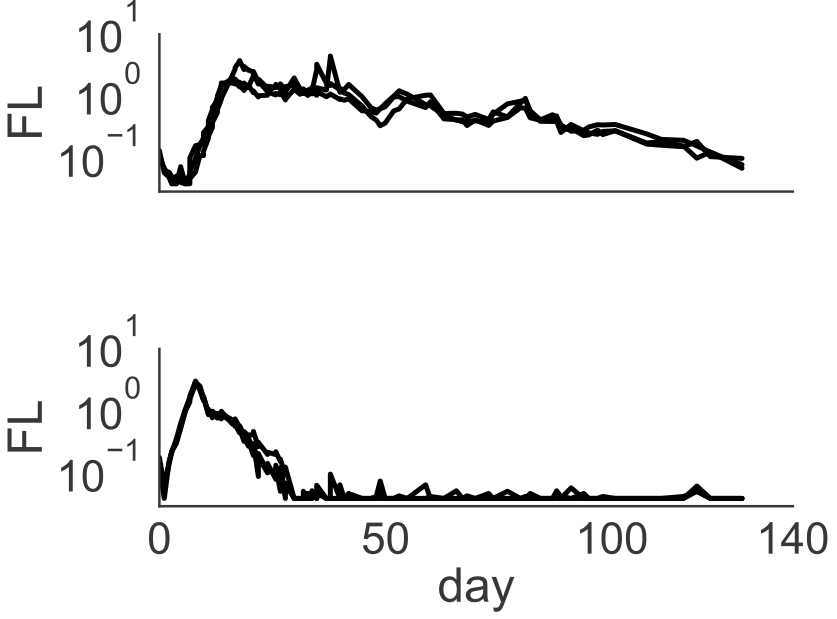

In [41]:
sns.set_context('poster', font_scale=2)
g= sns.relplot(
    data=mdf.loc[mdf.transfer.isin([0])],
    x='day', y='FL_clip',
    #col='transfer', col_order=[0,2,3,4,5],
    row='full name', row_order=['A. macleodii 1A3', 'Axenic'],
    #hue='Group', 
    estimator=None, units='Sample', lw=5,
    kind='line', #hue_order=gorder, palette=gpalette,
    color='black',
    legend=False, aspect=2.5, height=5,
)
# for (row_val), ax in g.axes_dict.items():        
#     sns.lineplot(
#         data=mdf.loc[mdf.Group.isin(['Axenic']) & mdf.transfer.isin([0])], 
#         x='day', y='FL_clip',
#         color='black', lw=2, errorbar=None,
#         ax=ax,
#         legend=False,
#     )
g.set_titles('').set(yscale='log', ylim=(0.03,10), ylabel='FL', xticks=[0,50,100,140])
plt.subplots_adjust(hspace=1)

In [42]:
horder_tree

['Pseudoalteromonas haloplanktis',
 'A. macleodii 1A3',
 'Marinobacter adhaerens HP15',
 'Phaeobacter gallaeciensis',
 'Ruegeria pomeroyi',
 'Marinovum 5F3',
 'Roseovarius 5C3',
 'Sulfitobacter pseudonitzschiae']

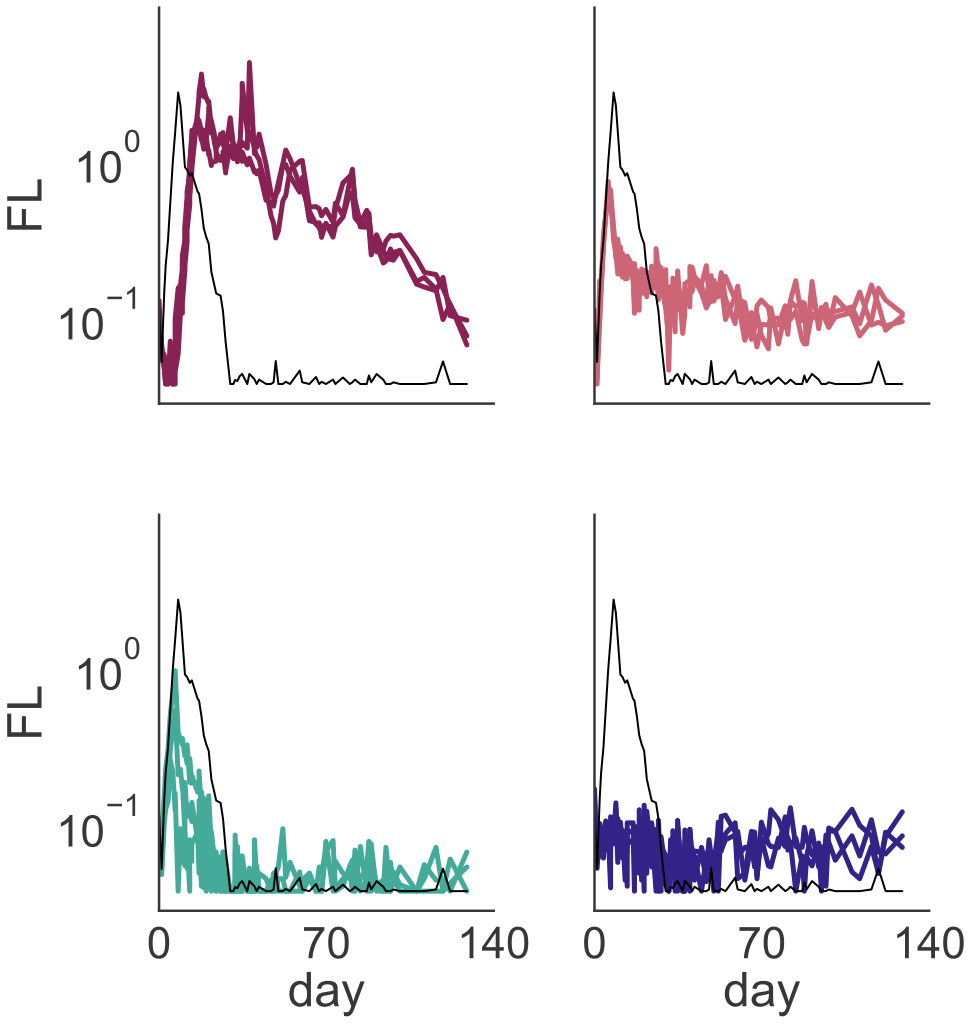

In [43]:
horder_partial = ['A. macleodii 1A3', 'Ruegeria pomeroyi', 'Roseovarius 5C3', 'Marinobacter adhaerens HP15',]
sns.set_context('poster', font_scale=2)
g= sns.relplot(
    data=mdf.loc[mdf.transfer.isin([0]) & mdf['full name'].isin(horder_partial)],
    x='day', y='FL_clip',
    #col='transfer', col_order=[0,2,3,4,5],
    col='full name', col_order=horder_partial, col_wrap=2,
    hue='Group', 
    estimator=None, units='Sample', lw=5,
    kind='line', hue_order=gorder, palette=gpalette,
    legend=False, aspect=0.9, height=8,
)
for (row_val), ax in g.axes_dict.items():        
    sns.lineplot(
        data=mdf.loc[mdf.Group.isin(['Axenic']) & mdf.transfer.isin([0])], 
        x='day', y='FL_clip',
        color='black', lw=2, errorbar=None,
        ax=ax,
        legend=False,
    )
    #ax.yaxis.set_label_position("right")
    #ax.yaxis.tick_right()
    #ax.tick_params(axis='x', pad=50)
#sns.despine(left=True, bottom=True,)
g.set_titles('').set(yscale='log', ylim=(0.03,10), ylabel='FL', xticks=[0,70,140], yticks=[1e-1,1e0])
#plt.subplots_adjust(hspace=0.1)

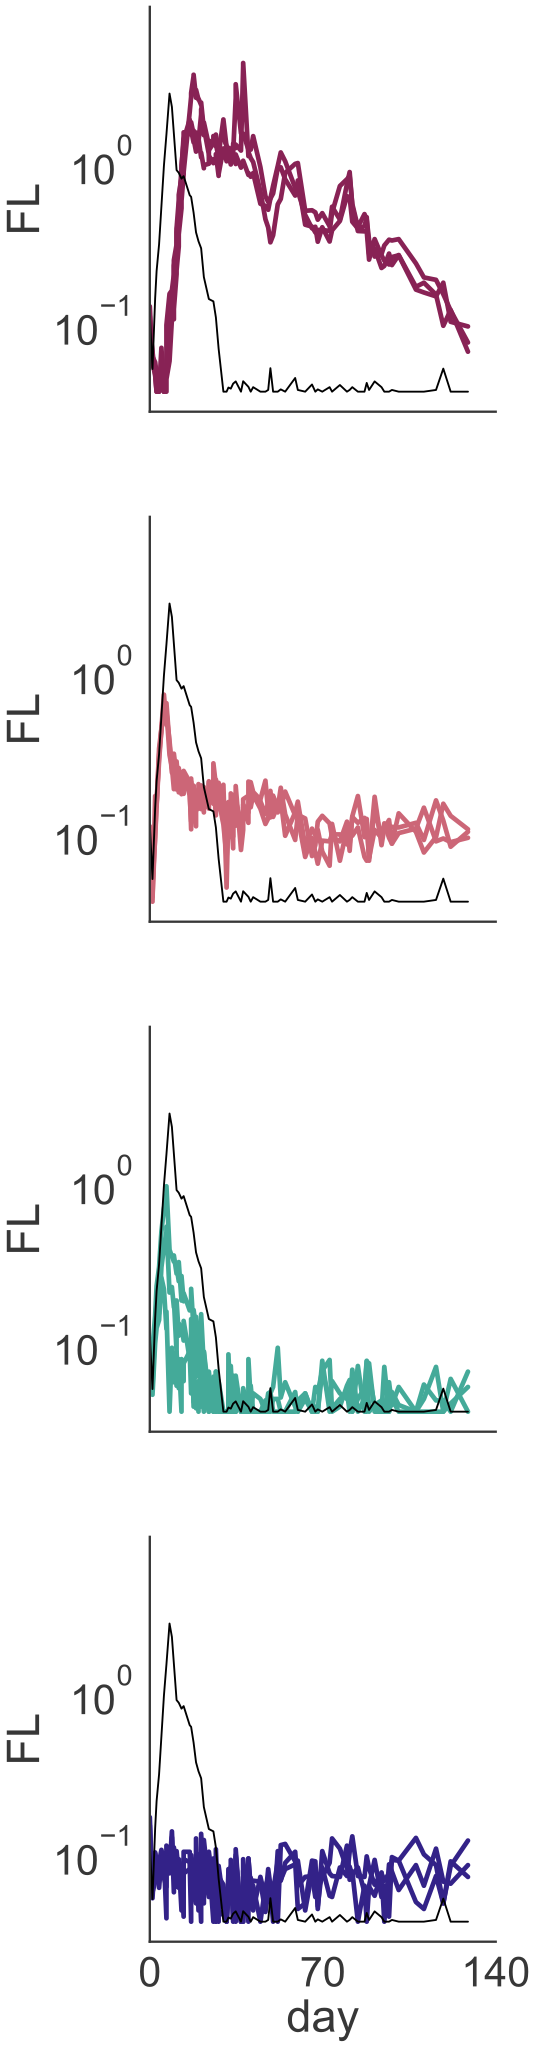

In [44]:
horder_partial = ['A. macleodii 1A3', 'Ruegeria pomeroyi', 'Roseovarius 5C3', 'Marinobacter adhaerens HP15',]
sns.set_context('poster', font_scale=2)
g= sns.relplot(
    data=mdf.loc[mdf.transfer.isin([0]) & mdf['full name'].isin(horder_partial)],
    x='day', y='FL_clip',
    #col='transfer', col_order=[0,2,3,4,5],
    col='full name', col_order=horder_partial, col_wrap=1,
    hue='Group', 
    estimator=None, units='Sample', lw=5,
    kind='line', hue_order=gorder, palette=gpalette,
    legend=False, aspect=1.1, height=8,
)
for (row_val), ax in g.axes_dict.items():        
    sns.lineplot(
        data=mdf.loc[mdf.Group.isin(['Axenic']) & mdf.transfer.isin([0])], 
        x='day', y='FL_clip',
        color='black', lw=2, errorbar=None,
        ax=ax,
        legend=False,
    )
    #ax.yaxis.set_label_position("right")
    #ax.yaxis.tick_right()
    #ax.tick_params(axis='x', pad=50)
#sns.despine(left=True, bottom=True,)
g.set_titles('').set(yscale='log', ylim=(0.03,10), ylabel='FL', xticks=[0,70,140], yticks=[1e-1,1e0])
#plt.subplots_adjust(hspace=0.1)

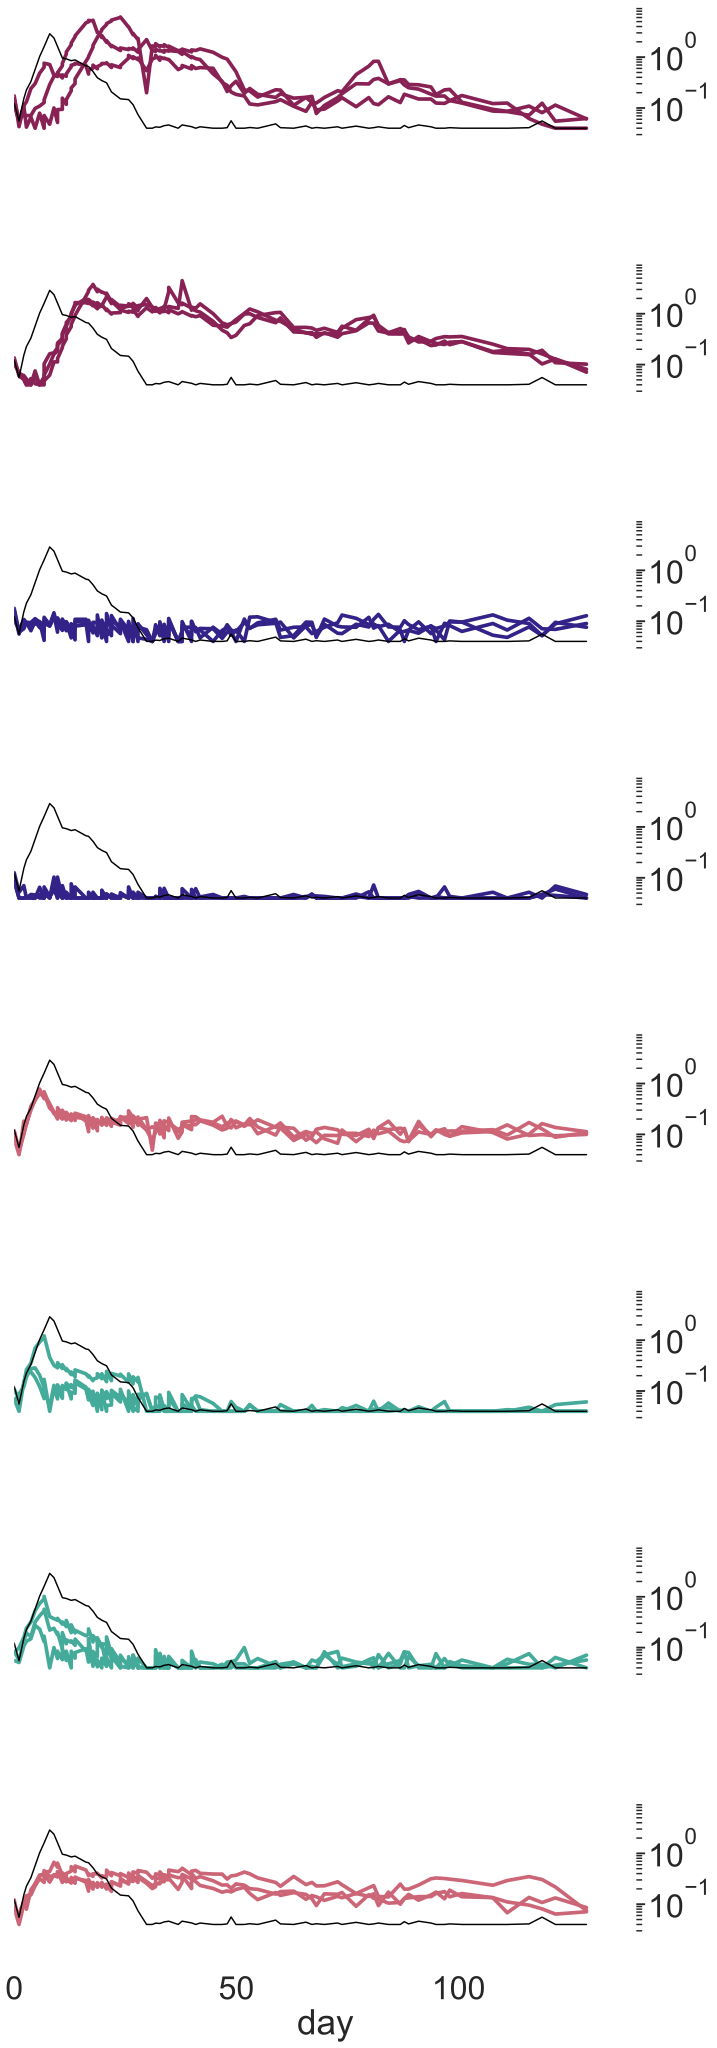

In [166]:
sns.set_context('poster', font_scale=2)
sns.set_style('white')
g= sns.relplot(
    data=mdf.loc[mdf.transfer.isin([0])],
    x='day', y='FL_clip',
    #col='transfer', col_order=[0,2,3,4,5],
    row='full name', row_order=horder_tree,
    hue='Group', 
    estimator=None, units='Sample', lw=5,
    kind='line', hue_order=gorder, palette=gpalette,
    legend=False, aspect=3, height=5,
)
for (row_val), ax in g.axes_dict.items():        
    sns.lineplot(
        data=mdf.loc[mdf.Group.isin(['Axenic']) & mdf.transfer.isin([0])], 
        x='day', y='FL_clip',
        color='black', lw=2, errorbar=None,
        ax=ax,
        legend=False,
    )
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.tick_params(axis='x', pad=50)
sns.despine(left=True, bottom=True,)
g.set_titles('').set(yscale='log', ylim=(0.03,10), ylabel='', xticks=[0,50,100], yticks=[1e-1,1e0])
plt.subplots_adjust(hspace=1)

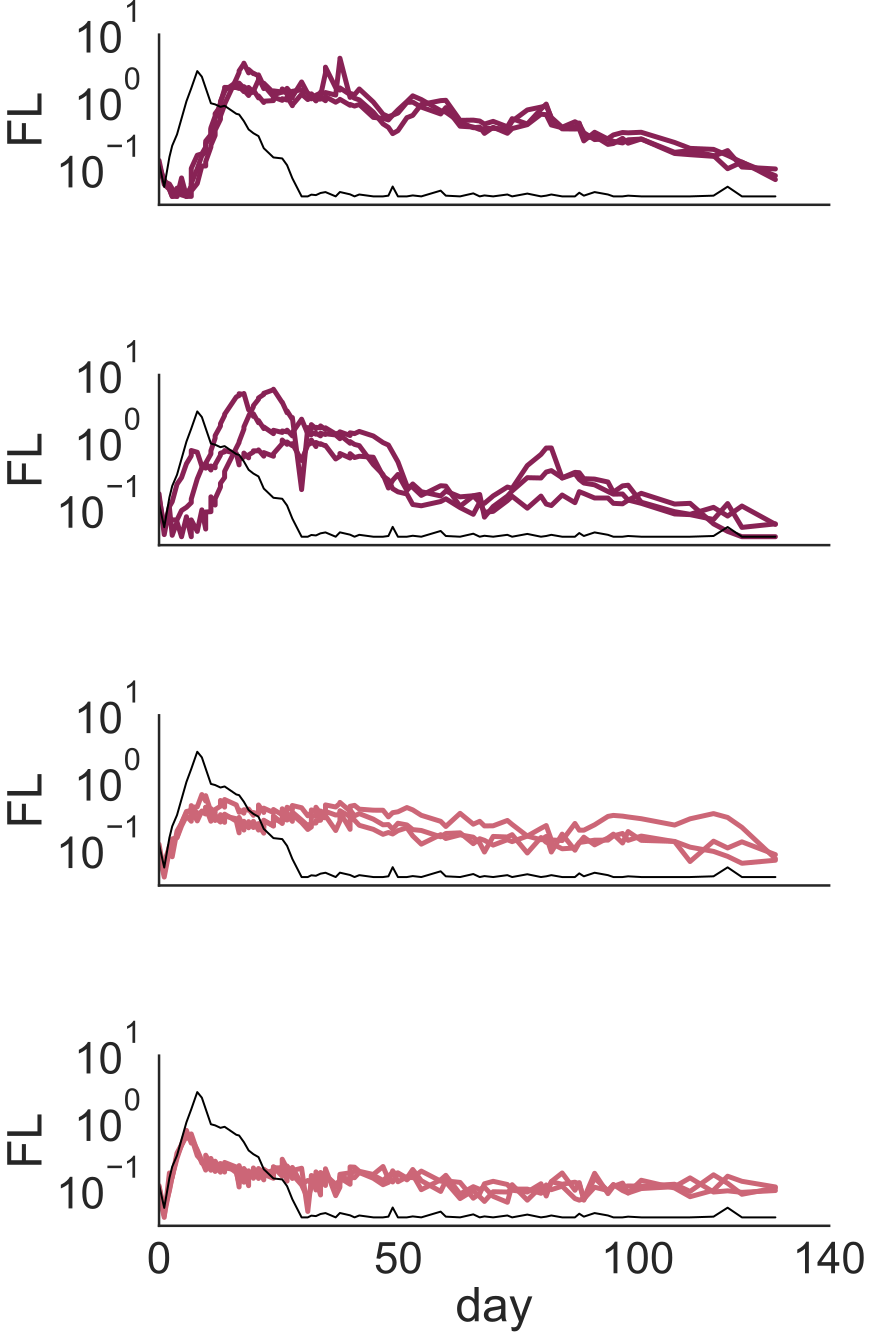

In [46]:
sns.set_context('poster', font_scale=2)
g= sns.relplot(
    data=mdf.loc[mdf.transfer.isin([0])],
    x='day', y='FL_clip',
    #col='transfer', col_order=[0,2,3,4,5],
    row='full name', row_order=group1 + group2,
    hue='Group', 
    estimator=None, units='Sample', lw=5,
    kind='line', hue_order=gorder, palette=gpalette,
    legend=False, aspect=2.5, height=5,
)
for (row_val), ax in g.axes_dict.items():        
    sns.lineplot(
        data=mdf.loc[mdf.Group.isin(['Axenic']) & mdf.transfer.isin([0])], 
        x='day', y='FL_clip',
        color='black', lw=2, errorbar=None,
        ax=ax,
        legend=False,
    )
g.set_titles('').set(yscale='log', ylim=(0.03,10), ylabel='FL', xticks=[0,50,100,140])
plt.subplots_adjust(hspace=1)

In [47]:
16/5

3.2

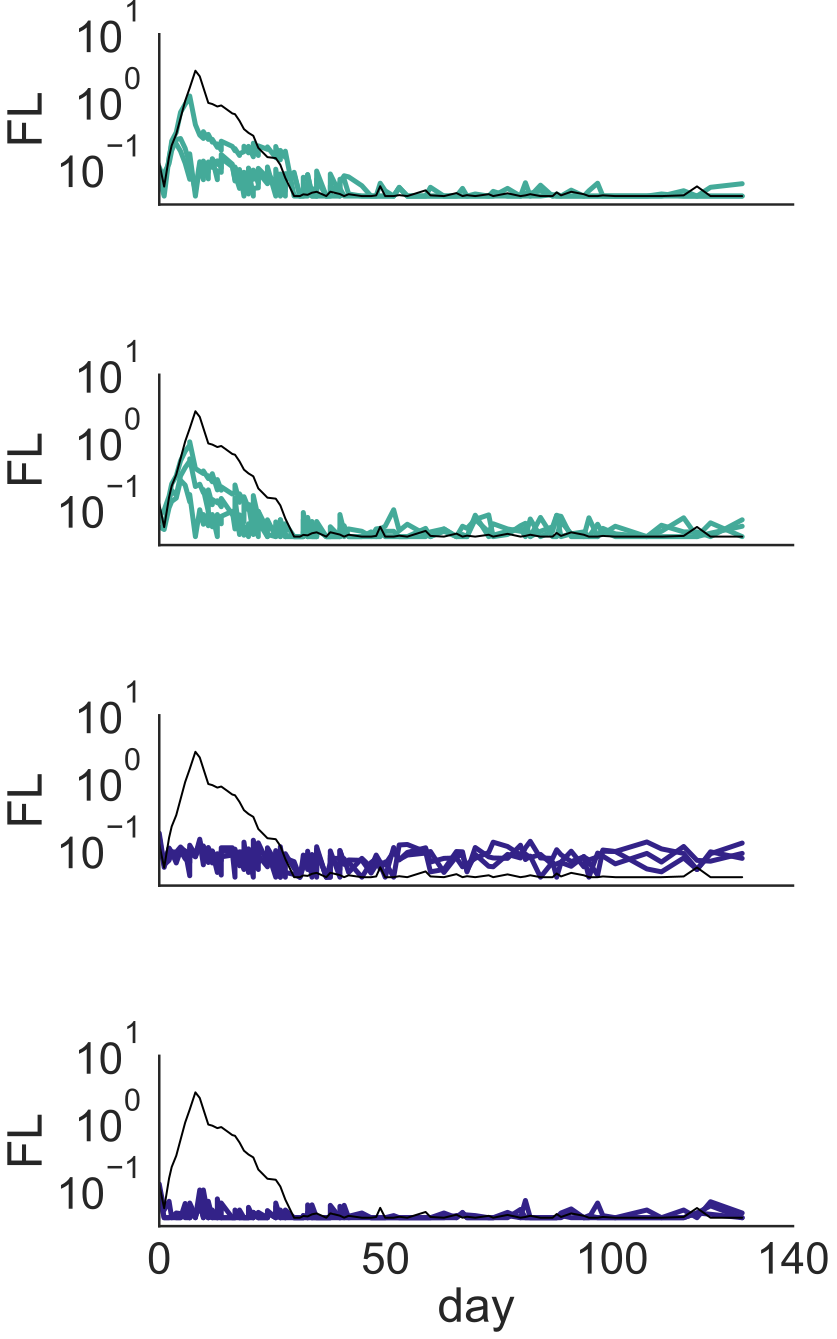

In [48]:
sns.set_context('poster', font_scale=2)
g= sns.relplot(
    data=mdf.loc[mdf.transfer.isin([0])],
    x='day', y='FL_clip',
    #col='transfer', col_order=[0,2,3,4,5],
    row='full name', row_order=group3 + group4,
    hue='Group', 
    estimator=None, units='Sample', lw=5,
    kind='line', hue_order=gorder, palette=gpalette,
    legend=False, aspect=2.5, height=5,
)
for (row_val), ax in g.axes_dict.items():        
    sns.lineplot(
        data=mdf.loc[mdf.Group.isin(['Axenic']) & mdf.transfer.isin([0])], 
        x='day', y='FL_clip',
        color='black', lw=2, errorbar=None,
        ax=ax,
        legend=False,
    )
g.set_titles('').set(yscale='log', ylim=(0.03,10), ylabel='FL', xticks=[0,50,100,140])
plt.subplots_adjust(hspace=1)

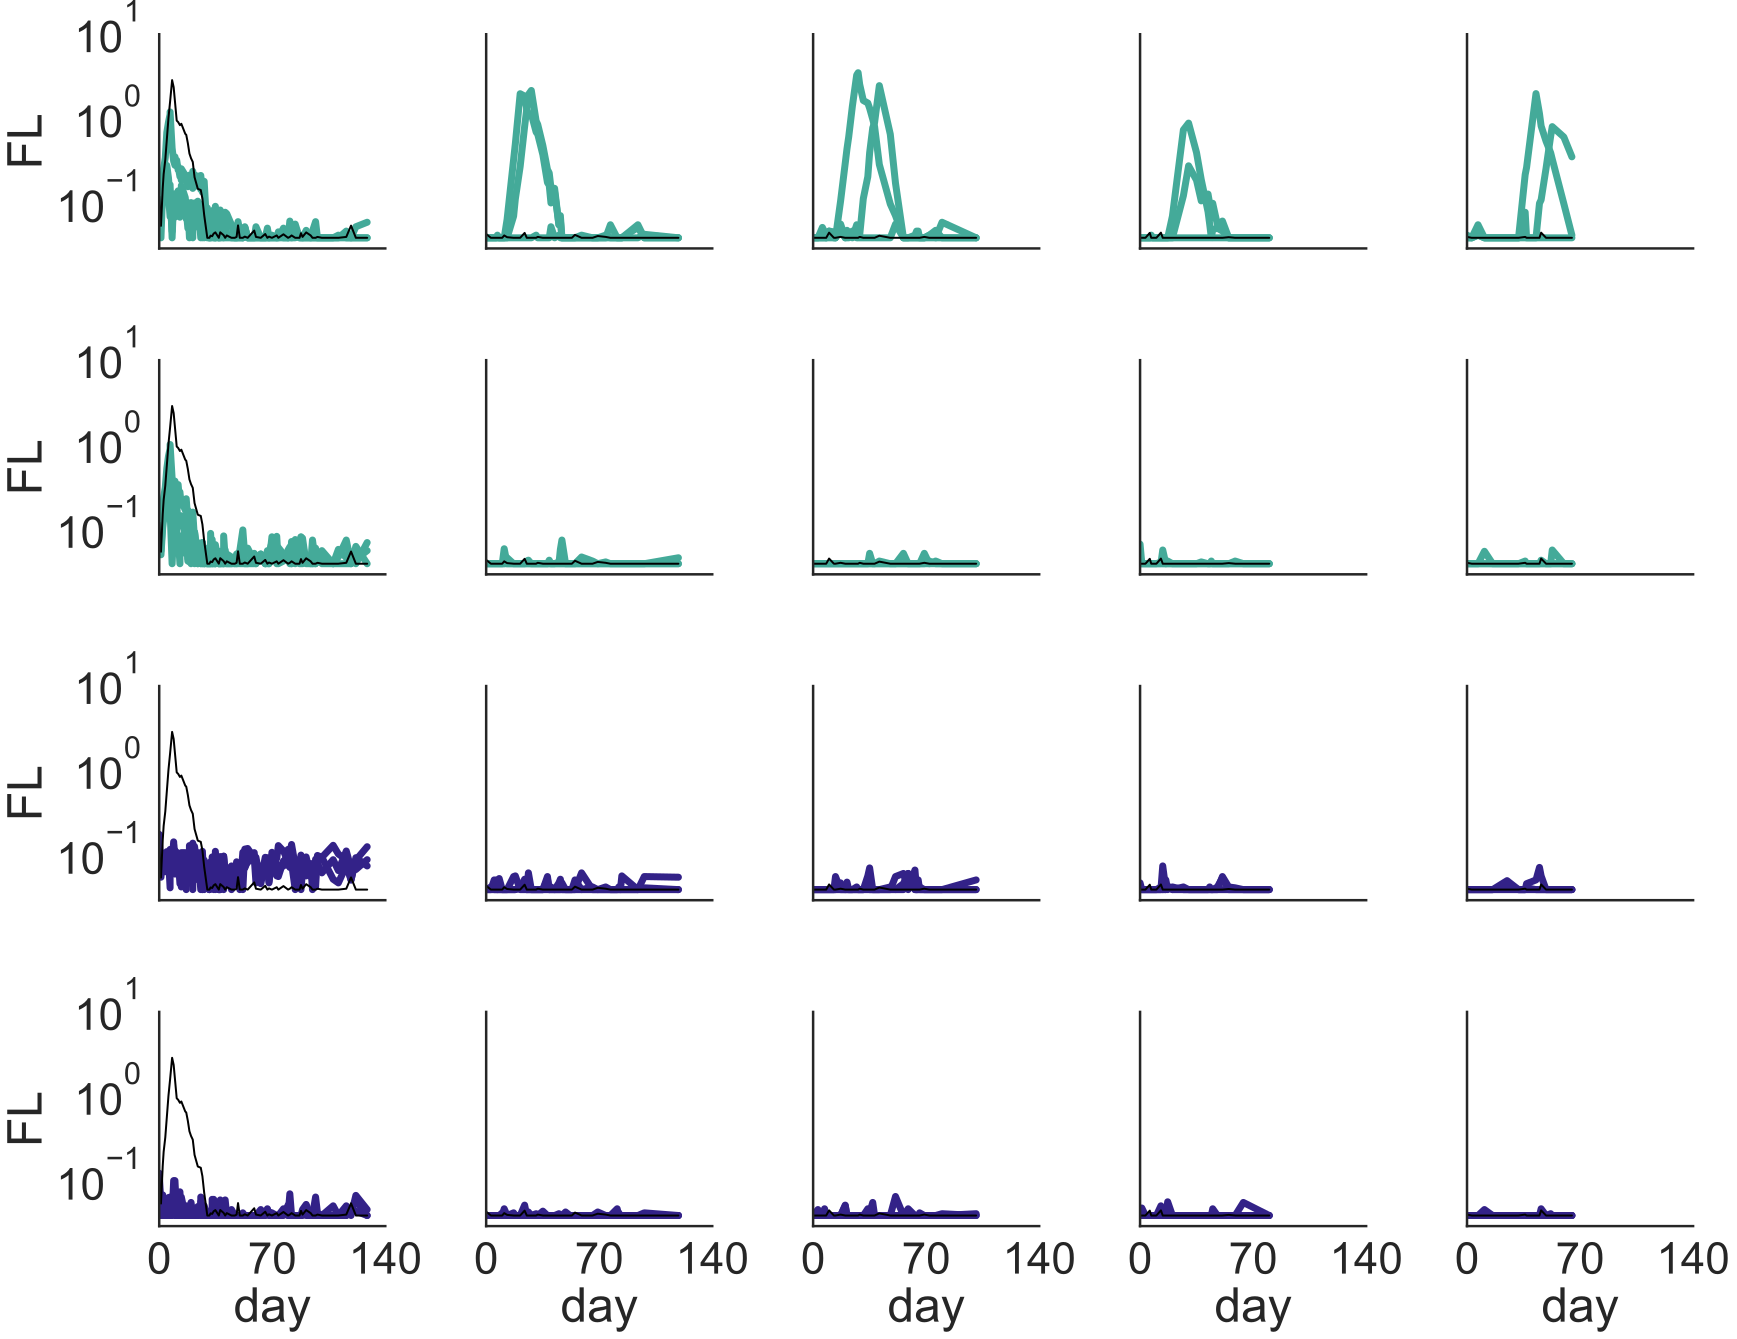

In [49]:
g= sns.relplot(
    data=mdf,
    x='day', y='FL_clip',
    col='transfer', col_order=[0,2,3,4,5],
    row='full name', row_order=group3 + group4,
    hue='Group', 
    estimator=None, units='Sample', lw=7,
    kind='line', hue_order=gorder, palette=gpalette,
    legend=False,
)
for (row_val, col_val), ax in g.axes_dict.items():        
    sns.lineplot(
        data=mdf.loc[mdf.Group.isin(['Axenic']) & mdf.transfer.isin([col_val])], 
        x='day', y='FL_clip',
        color='black', lw=2, errorbar=None,
        ax=ax,
        legend=False,
    )
g.set_titles('').set(yscale='log', ylim=(0.03,10), ylabel='FL', xticks=[0,70,140])
    

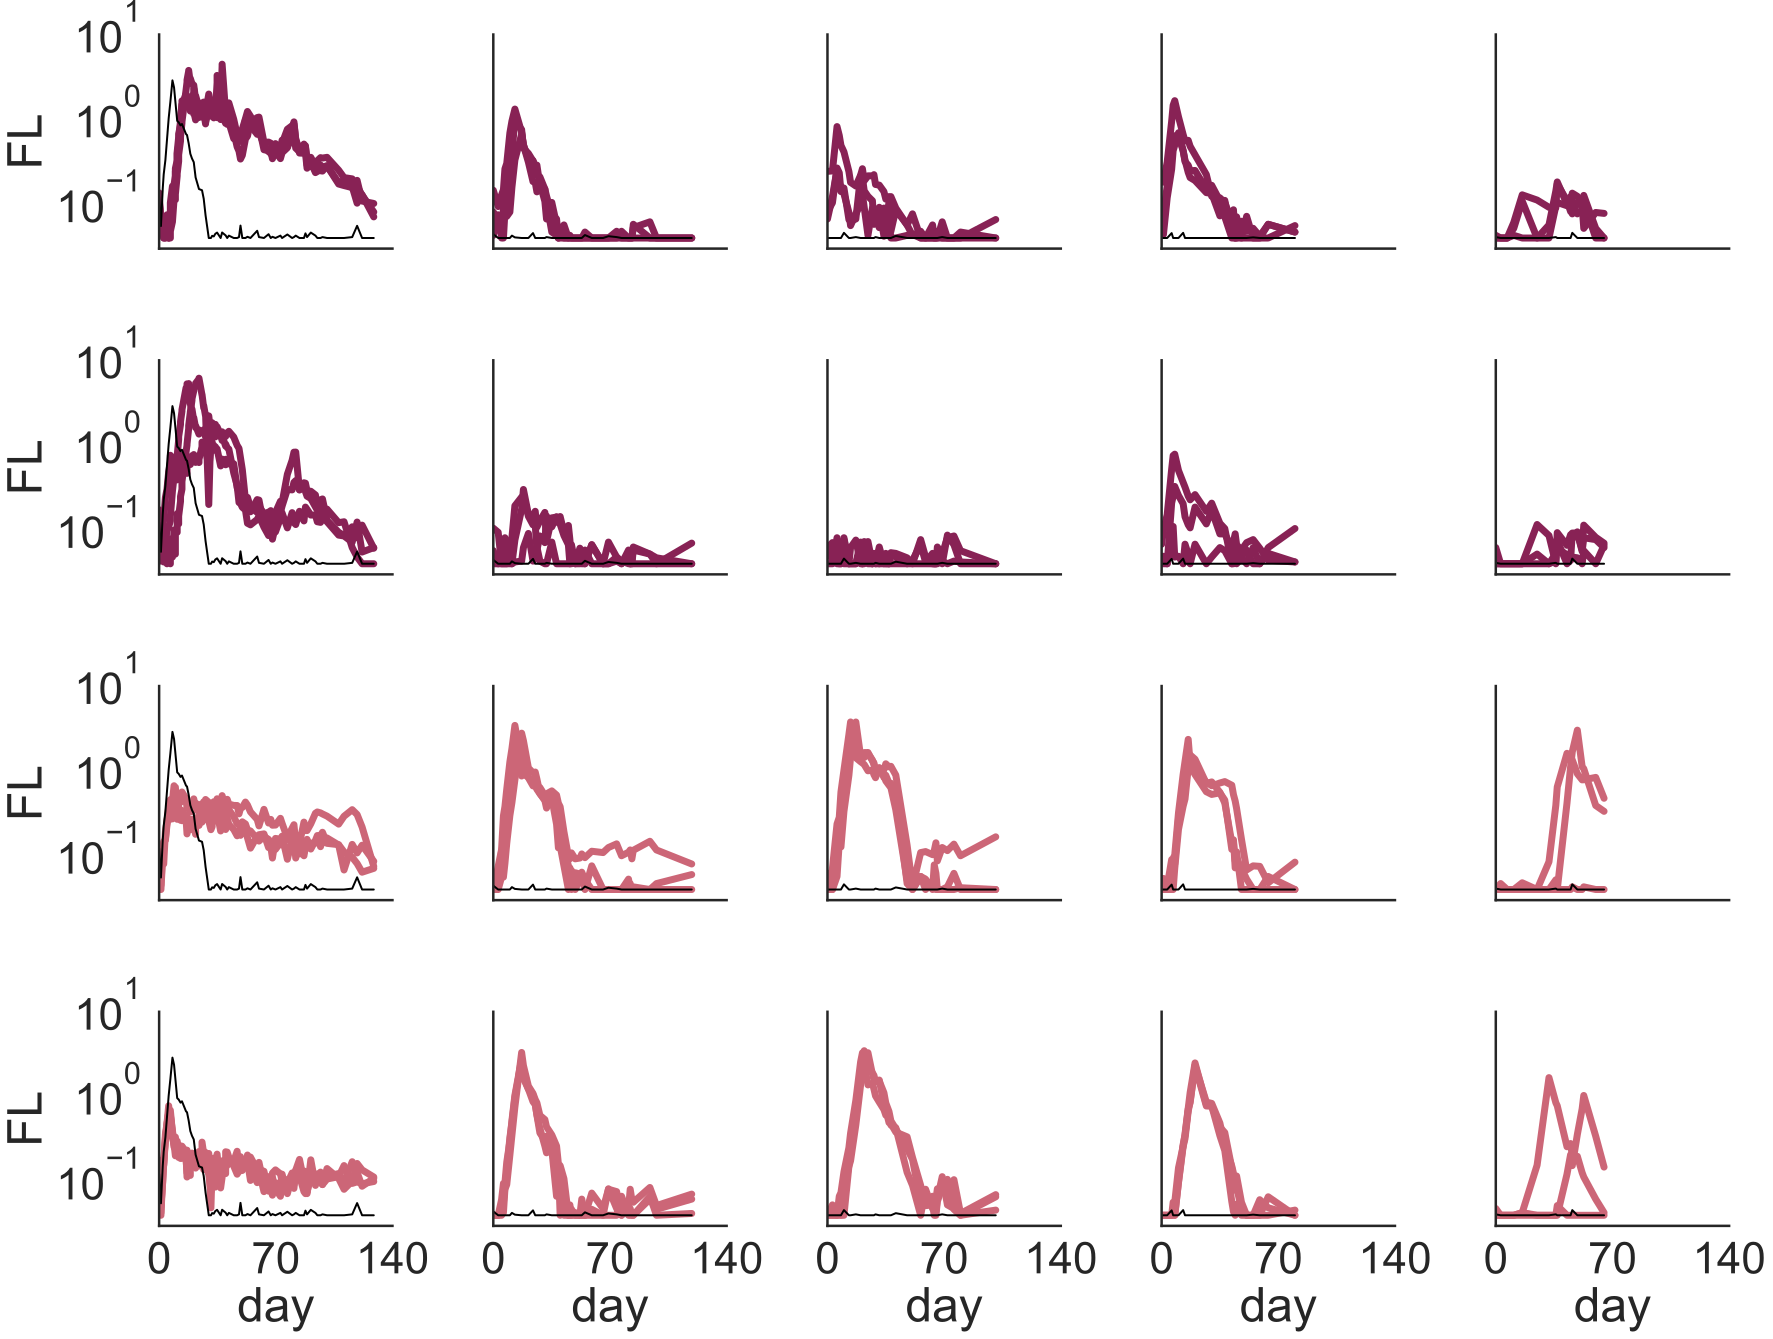

In [50]:
g= sns.relplot(
    data=mdf,
    x='day', y='FL_clip',
    col='transfer', col_order=[0,2,3,4,5],
    row='full name', row_order=group1 + group2,
    hue='Group', 
    estimator=None, units='Sample', lw=7,
    kind='line', hue_order=gorder, palette=gpalette,
    legend=False,
)
for (row_val, col_val), ax in g.axes_dict.items():        
    sns.lineplot(
        data=mdf.loc[mdf.Group.isin(['Axenic']) & mdf.transfer.isin([col_val])], 
        x='day', y='FL_clip',
        color='black', lw=2, errorbar=None,
        ax=ax,
        legend=False,
    )
g.set_titles('').set(yscale='log', ylim=(0.03,10), ylabel='FL', xticks=[0,70,140])
    

In [51]:
print('\n'.join(group1 + group2,))

A. macleodii 1A3
Pseudoalteromonas haloplanktis
Sulfitobacter pseudonitzschiae
Ruegeria pomeroyi


In [52]:
print('\n'.join(group3 + group4,))


Marinovum 5F3
Roseovarius 5C3
Marinobacter adhaerens HP15
Phaeobacter gallaeciensis


In [53]:
print('\n'.join(gorder,))


Strong
Sustained
Inhibited
Weak
Neutral
Other


In [54]:
hpalette

['#1b9e77',
 '#d95f02',
 '#55dd77',
 '#aa926b',
 '#0080bf',
 '#00c09f',
 '#ff55aa',
 '#ffaa55',
 'black']

In [55]:
transfer_days

[42, 60, 81, 129]

In [56]:
fcm_mdf['transfer_success'] = fcm_mdf['Sample'].map((mdf.groupby(['Sample'])['FL'].max() > 0.1))

In [57]:
gorder

['Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral', 'Other']

In [58]:
fcm_mdf.variable.unique()
fcm_mdf.variable = fcm_mdf.variable.map({
    'med4' : 'med4 (FCM)', 
    'het' : 'het (FCM)', 
})

In [59]:
fcm_mdf['Sample'] = fcm_mdf['id'].astype('str') + fcm_mdf['replicate'] + '0'

In [60]:
fcm_mdf.loc[fcm_mdf.variable.isin(['med4 (FCM)']) & ~fcm_mdf.id.isin([8])]

,tube,Sample,id,replicate,transfer,heterotroph,full name,date,transfer day,variable,value,transfer_success
26,specimen_1_CC_001_Tube_002_001.fcs,1A0,1,A,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),9.581642e+06,True
27,specimen_1_CC_001_Tube_003_002.fcs,1B0,1,B,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),4.938495e+06,False
28,specimen_1_CC_001_Tube_004_003.fcs,1C0,1,C,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),4.415860e+06,False
29,specimen_1_CC_001_Tube_005_004.fcs,2A0,2,A,1.0,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,med4 (FCM),4.240275e+07,True
30,specimen_1_CC_001_Tube_006_005.fcs,2B0,2,B,1.0,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,med4 (FCM),6.931002e+07,True
...,...,...,...,...,...,...,...,...,...,...,...,...
314,specimen_3_CC_Tube_028_154.fcs,5C0,5,C,5.0,CIP,Pseudoalteromonas haloplanktis,2021-08-29 15:49:00,128.984028,med4 (FCM),6.403112e+04,False
315,specimen_3_CC_Tube_029_155.fcs,6C0,6,C,5.0,DSS-3,Ruegeria pomeroyi,2021-08-29 15:49:00,128.984028,med4 (FCM),8.053329e+05,False
316,specimen_3_CC_Tube_030_156.fcs,7C0,7,C,5.0,nitzsch,Sulfitobacter pseudonitzschiae,2021-08-29 15:49:00,128.984028,med4 (FCM),1.304324e+05,False
317,specimen_3_CC_Tube_032_157.fcs,9C0,9,C,5.0,k-12,E. coli,2021-08-29 15:49:00,128.984028,med4 (FCM),1.472393e+03,False


In [61]:
rel_mdf = mdf.loc[(mdf.transfer == 0) & (mdf.id != 8)].copy()

In [62]:
rel_fcmdf = fcm_mdf.loc[fcm_mdf.variable.isin(['med4 (FCM)']) & ~fcm_mdf.id.isin([8])].copy()

In [63]:
rel_mdf['roundday'] = rel_mdf.day.astype(int)
rel_fcmdf['roundday'] = rel_fcmdf['transfer day'].astype(int)


In [64]:
rel_fcmdf

,tube,Sample,id,replicate,transfer,heterotroph,full name,date,transfer day,variable,value,transfer_success,roundday
26,specimen_1_CC_001_Tube_002_001.fcs,1A0,1,A,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),9.581642e+06,True,19
27,specimen_1_CC_001_Tube_003_002.fcs,1B0,1,B,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),4.938495e+06,False,19
28,specimen_1_CC_001_Tube_004_003.fcs,1C0,1,C,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),4.415860e+06,False,19
29,specimen_1_CC_001_Tube_005_004.fcs,2A0,2,A,1.0,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,med4 (FCM),4.240275e+07,True,19
30,specimen_1_CC_001_Tube_006_005.fcs,2B0,2,B,1.0,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,med4 (FCM),6.931002e+07,True,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,specimen_3_CC_Tube_028_154.fcs,5C0,5,C,5.0,CIP,Pseudoalteromonas haloplanktis,2021-08-29 15:49:00,128.984028,med4 (FCM),6.403112e+04,False,128
315,specimen_3_CC_Tube_029_155.fcs,6C0,6,C,5.0,DSS-3,Ruegeria pomeroyi,2021-08-29 15:49:00,128.984028,med4 (FCM),8.053329e+05,False,128
316,specimen_3_CC_Tube_030_156.fcs,7C0,7,C,5.0,nitzsch,Sulfitobacter pseudonitzschiae,2021-08-29 15:49:00,128.984028,med4 (FCM),1.304324e+05,False,128
317,specimen_3_CC_Tube_032_157.fcs,9C0,9,C,5.0,k-12,E. coli,2021-08-29 15:49:00,128.984028,med4 (FCM),1.472393e+03,False,128


In [65]:
train_df = pd.merge(rel_fcmdf, rel_mdf, on=['Sample', 'roundday'], how='left' )

In [66]:
train_df.isna().sum()

tube                0
Sample              0
id_x                0
replicate_x         0
transfer_x          0
heterotroph_x       0
full name_x         0
date_x              0
transfer day_x      0
variable            0
value               0
transfer_success    0
roundday            0
day                 0
FL                  0
id_y                0
replicate_y         0
transfer_y          0
heterotroph_y       0
full name_y         0
date_y              0
transfer day_y      0
Group               0
FL_clip             0
dtype: int64

In [67]:
train_df = train_df.rename(columns={'value': 'FCM'})

In [68]:
train_df['LOD'] = train_df.FL <= 0.04

In [69]:
train_df['log10FCM'] = np.log10(train_df.FCM)
train_df['log10FL'] = np.log10(train_df.FL.clip(lower=0.04))

In [70]:
x = train_df.loc[~train_df.LOD, 'FL']
y= train_df.loc[~train_df.LOD,'FCM']
#x = sm.add_constant(x)

In [71]:
model = sm.OLS(y, x)

In [72]:
results = model.fit()

In [73]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    FCM   R-squared (uncentered):                   0.735
Model:                            OLS   Adj. R-squared (uncentered):              0.733
Method:                 Least Squares   F-statistic:                              385.2
Date:                Sat, 16 Nov 2024   Prob (F-statistic):                    6.74e-42
Time:                        16:28:37   Log-Likelihood:                         -2500.8
No. Observations:                 140   AIC:                                      5004.
Df Residuals:                     139   BIC:                                      5007.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [74]:
print(f"coefficient of determination: {results.rsquared}")
print(f"adjusted coefficient of determination: {results.rsquared_adj}")
print(f"regression coefficients: {results.params}")

coefficient of determination: 0.7348435618384501
adjusted coefficient of determination: 0.7329359615639066
regression coefficients: FL    2.626432e+07
dtype: float64


In [75]:
train_df['predicted'] = results.predict( train_df['FL'])
train_df['predicted_Bp'] = train_df['predicted']* Qp * 1e3
train_df['ref_Bp'] = train_df['FCM']* Qp * 1e3

In [76]:
predicted_below_LOD = results.predict([0.04, 0.1])
f'{predicted_below_LOD[0]:.2e}, {predicted_below_LOD[1]:.2e}, '

'1.05e+06, 2.63e+06, '

In [77]:
predicted_below_LOD * Qp * 1e3, 1e6* Qp * 1e3, 

(array([0.93801129, 2.34502821]), 0.8928571428571429)

In [78]:
mdf['predicted'] = results.predict(mdf['FL'])

In [79]:
mdf['ref_Bp[N]'] = mdf['predicted']* Qp * 1e3
mdf['ref_Bp[C]'] = mdf['ref_Bp[N]'] * 6.625


In [80]:
pro99_mdf = pro99_mdf.rename(columns={'Day': 'day'})


In [81]:
pro99_mdf['Group'] = 'Axenic_PRO99'
pro99_mdf['full name'] = 'Axenic_PRO99'
pro99_mdf['predicted'] = results.predict(pro99_mdf['FL'])
pro99_mdf['ref_Bp[N]'] = pro99_mdf['predicted']* Qp * 1e3
pro99_mdf['ref_Bp[C]'] = pro99_mdf['ref_Bp[N]'] * 6.625


In [82]:
pro99_mdf.columns

Index(['Date', 'day', 'Sample', 'FL', 'Group', 'full name', 'predicted',
       'ref_Bp[N]', 'ref_Bp[C]'],
      dtype='object')

In [83]:
sns.set_context('poster')

In [84]:
train_df

,tube,Sample,id_x,replicate_x,transfer_x,heterotroph_x,full name_x,date_x,transfer day_x,variable,...,date_y,transfer day_y,Group,FL_clip,LOD,log10FCM,log10FL,predicted,predicted_Bp,ref_Bp
0,specimen_1_CC_001_Tube_002_001.fcs,1A0,1,A,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),...,2021-04-22 16:12:00,0.0,Axenic,0.401,False,6.981440,-0.396856,1.053199e+07,9.403563,8.555038
1,specimen_1_CC_001_Tube_002_001.fcs,1A0,1,A,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),...,2021-04-22 16:12:00,0.0,Axenic,0.417,False,6.981440,-0.379864,1.095222e+07,9.778768,8.555038
2,specimen_1_CC_001_Tube_002_001.fcs,1A0,1,A,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),...,2021-04-22 16:12:00,0.0,Axenic,0.403,False,6.981440,-0.394695,1.058452e+07,9.450464,8.555038
3,specimen_1_CC_001_Tube_003_002.fcs,1B0,1,B,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),...,2021-04-22 16:12:00,0.0,Axenic,0.302,False,6.693595,-0.519993,7.931823e+06,7.081985,4.409371
4,specimen_1_CC_001_Tube_003_002.fcs,1B0,1,B,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),...,2021-04-22 16:12:00,0.0,Axenic,0.303,False,6.693595,-0.518557,7.958088e+06,7.105435,4.409371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,specimen_3_CC_Tube_028_154.fcs,5C0,5,C,5.0,CIP,Pseudoalteromonas haloplanktis,2021-08-29 15:49:00,128.984028,med4 (FCM),...,2021-04-22 16:12:00,0.0,Strong,0.061,False,4.806391,-1.214670,1.602123e+06,1.430467,0.057171
157,specimen_3_CC_Tube_029_155.fcs,6C0,6,C,5.0,DSS-3,Ruegeria pomeroyi,2021-08-29 15:49:00,128.984028,med4 (FCM),...,2021-04-22 16:12:00,0.0,Sustained,0.109,False,5.905975,-0.962574,2.862810e+06,2.556081,0.719047
158,specimen_3_CC_Tube_030_156.fcs,7C0,7,C,5.0,nitzsch,Sulfitobacter pseudonitzschiae,2021-08-29 15:49:00,128.984028,med4 (FCM),...,2021-04-22 16:12:00,0.0,Sustained,0.071,False,5.115386,-1.148742,1.864766e+06,1.664970,0.116458
159,specimen_3_CC_Tube_032_157.fcs,9C0,9,C,5.0,k-12,E. coli,2021-08-29 15:49:00,128.984028,med4 (FCM),...,2021-04-22 16:12:00,0.0,nan,0.099,False,3.168024,-1.004365,2.600167e+06,2.321578,0.001315


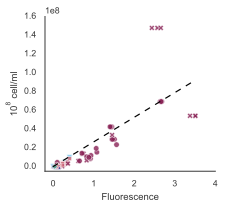

In [164]:
sns.set_context('paper')
g = sns.relplot(data=train_df.loc[train_df['full name_x'].isin(horder)] , 
                x='FL', y='FCM', #s=100, 
           height=3,
            s=30, alpha=0.8, lw=0.5, aspect=1.1,
            hue='full name_x', hue_order=horder, palette=hpalette_g + [gpalette_dict['Neutral']],
    style='full name_x', style_order=horder,
            # s=100, alpha=0.7, lw=0.5,
            # hue='Group', hue_order=gorder[:-2], palette=gpalette[:-2],
                legend=False,
          )

sns.lineplot(data=train_df, x='FL', y='predicted', color='black', ls='--', legend=False)
g.set(xticks=[0,1,2,3,4],
      ylim=(-5e6,1.6e8), xlim=(-0.2,4), xlabel='Fluorescence', ylabel='$\mathregular{10^8}$ cell/ml')
#plt.legend( numpoints = 1 )
#sns.despine(bottom=True, left=True)
#plt.xscale('log')
#plt.yscale('log')

In [86]:
mpn_df['ref_Bp[N]'] = mpn_df['med4']* Qp * 1e3
mpn_df['ref_Bp[C]'] = mpn_df['ref_Bp[N]'] * 6.625

mpn_df['FCM ref_Bh[N]'] = mpn_df['FCM']* Qh * 1e3
mpn_df['FCM ref_Bh[C]'] = mpn_df['FCM ref_Bh[N]'] * 5

mpn_df['MPN ref_Bh[N]'] = mpn_df['MPN']* Qh * 1e3
mpn_df['MPN ref_Bh[C]'] = mpn_df['MPN ref_Bh[N]'] * 5

mpn_df['Het/Pro (FCM)'] = mpn_df['FCM ref_Bh[C]'].div(mpn_df['ref_Bp[C]'])
mpn_df['Het/Pro (MPN)'] = mpn_df['MPN ref_Bh[C]'].div(mpn_df['ref_Bp[C]'])


In [87]:
mpn_df['full name'].unique()

array(['Axenic', 'A. macleodii 1A3', 'Marinobacter adhaerens HP15',
       'Phaeobacter gallaeciensis', 'Pseudoalteromonas haloplanktis',
       'Ruegeria pomeroyi', 'Sulfitobacter pseudonitzschiae', 'E. coli',
       'Marinovum 5F3', 'Roseovarius 5C3'], dtype=object)

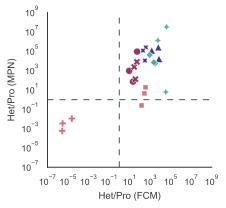

In [162]:

g = sns.relplot(data=mpn_df.loc[mpn_df['full name'].isin(horder_tree)], 
    x='Het/Pro (FCM)', y='Het/Pro (MPN)', 
           height=3,
            s=50, alpha=0.9, lw=0.5, aspect=1.1,
            hue='full name', hue_order=horder[:-1], palette=hpalette_g,
    style='full name', style_order=horder[:-1],
                legend=False,
          )
g.set(xscale='log', yscale='log' , ylim=(1e-7,1e9), xlim=(1e-7,1e9),)
#plt.axline((0,0), (1,1), ls='--')
plt.axhline(1, ls='--')
plt.axvline(1, ls='--')



In [89]:
horder
sns.color_palette(gpalette)
gpalette_dict

{'Strong': '#882255',
 'Sustained': '#CC6677',
 'Inhibited': '#332288',
 'Weak': '#44AA99',
 'Neutral': '#88CCEE',
 'Other': '#D0CFCA'}

In [90]:
gorder1 = ['Strong', 'Sustained', 'Inhibited', 'Weak', 'Axenic', ]
gpalette1 = gpalette[:-1]

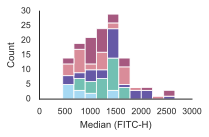

In [91]:
mpn_df.columns
sns.set_context('paper')
sns.displot(
    data=mpn_df,
    x='het | Median (FITC-H)',
            #hue='full name', hue_order=horder, palette=hpalette_g + [gpalette_dict['Neutral']],
            hue='Group', hue_order=gorder1, palette=gpalette1,
    multiple='stack',
    #log_scale=True,
    legend=False,
    #bins=15,
    height=2, aspect=1.5,
    
    
).set(xlabel='Median (FITC-H)')


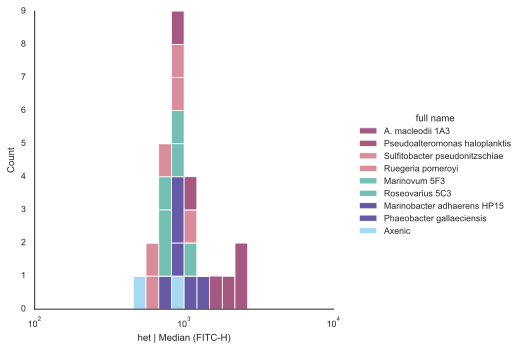

In [92]:
mpn_df.columns
sns.set_context('paper')
sns.displot(
    data=mpn_df.loc[mpn_df.transfer.isin([5])],
    x='het | Median (FITC-H)',
            hue='full name', hue_order=horder, palette=hpalette_g + [gpalette_dict['Neutral']],
    multiple='stack',
    log_scale=True,
    #legend=False,
    #bins=15,
    
    
)

In [93]:
mmpn_df = mpn_df.melt(id_vars=[
    'id', 'replicate', 'transfer', 
        'heterotroph', 'full name', 'date',
       'transfer day', 'Sample',
])

In [94]:
mmpn_df['Strain'] = mmpn_df.variable.map({
    'ref_Bp[C]' : 'Pro',  
    'FCM ref_Bh[C]' : 'Het (FCM)',  
    'MPN ref_Bh[C]' : 'Het (MPN)',
    
})

In [95]:
horder

['A. macleodii 1A3',
 'Pseudoalteromonas haloplanktis',
 'Sulfitobacter pseudonitzschiae',
 'Ruegeria pomeroyi',
 'Marinovum 5F3',
 'Roseovarius 5C3',
 'Marinobacter adhaerens HP15',
 'Phaeobacter gallaeciensis',
 'Axenic']

In [96]:
horder_nl = [
    'Alteromonas\nmacleodii 1A3',
 'Pseudoalteromonas\nhaloplanktis',
 'Sulfitobacter\npseudonitzschiae',
 'Ruegeria\npomeroyi',
# 'E. coli',
 'Marinovum 5F3',
 'Roseovarius 5C3',
 'Marinobacter\nadhaerens HP15',
 'Phaeobacter\ngallaeciensis',
    'Axenic',
    
]
horder1 = group1+group2+group3+group4
horder1
mmpn_df['full name nl'] = mmpn_df['full name'].map(dict(zip(horder, horder_nl)))

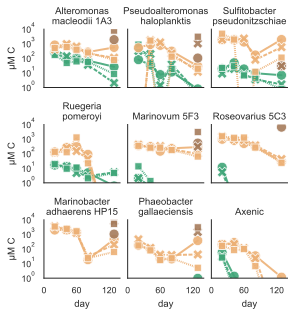

In [97]:
sorder = ['Pro',  'Het (FCM)', 'Het (MPN)', ]
spalette = [PCOLOR, HCOLOR, HCOLOR_dark]
sns.relplot(data=mmpn_df.loc[mmpn_df.Strain.isin(sorder)],
    x='transfer day', y='value', hue='Strain', 
            hue_order=sorder, palette=spalette,
            col='full name nl', col_wrap=3, ms=10, alpha=0.9,
            col_order=horder_nl,
            style='replicate', markers=True, lw=2,
            #units='replicate', estimator=None,
            kind='line', aspect=1, height=1.5,
            legend=False,
            
            #facet_kws=dict(sharey=False,),
           ).set(yscale='log', xticks=[0,60,120], ylim=(1,1e4), ylabel='µM C', xlabel='day', ).set_titles('{col_name}')
#plt.tight_layout()
plt.subplots_adjust(wspace=0.1)

In [98]:
sns.set_style('whitegrid')

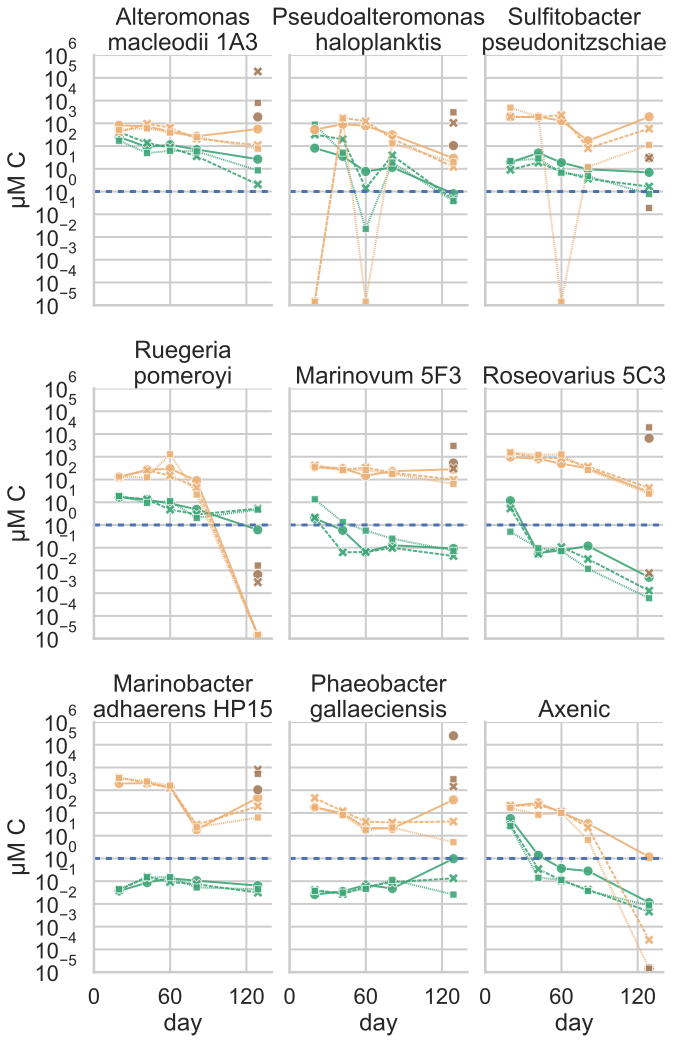

In [99]:
sns.set_context('poster')
sorder = ['Pro',  'Het (FCM)', 'Het (MPN)', ]
spalette = [PCOLOR, HCOLOR, HCOLOR_dark]
g= sns.relplot(data=mmpn_df.loc[mmpn_df.Strain.isin(sorder)],
    x='transfer day', y='value', hue='Strain', 
            hue_order=sorder, palette=spalette,
            col='full name nl', col_wrap=3, ms=10, alpha=0.9,
            col_order=horder_nl,
            style='replicate', markers=True, lw=2,
            #units='replicate', estimator=None,
            kind='line', aspect=0.7, height=5,
            legend=False,
            
            #facet_kws=dict(sharey=False,),
           ).set(yscale='log', xticks=[0,60,120], #ylim=(1,1e4), 
                 ylabel='µM C', xlabel='day', ).set_titles('{col_name}')
#plt.tight_layout()
for c,ax in g.axes_dict.items():
    ax.axhline(1, ls='--')
plt.subplots_adjust(wspace=0.1)

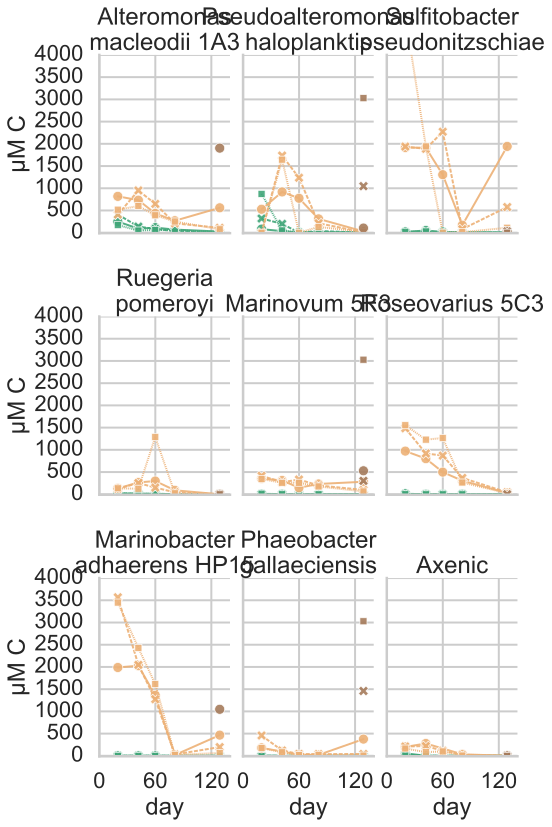

In [100]:
sns.set_context('poster')
sorder = ['Pro',  'Het (FCM)', 'Het (MPN)', ]
spalette = [PCOLOR, HCOLOR, HCOLOR_dark]
g= sns.relplot(data=mmpn_df.loc[mmpn_df.Strain.isin(sorder)],
    x='transfer day', y='value', hue='Strain', 
            hue_order=sorder, palette=spalette,
            col='full name nl', col_wrap=3, ms=10, alpha=0.9,
            col_order=horder_nl,
            style='replicate', markers=True, lw=2,
            #units='replicate', estimator=None,
            kind='line', aspect=0.7, height=4,
            legend=False,
            
            #facet_kws=dict(sharey=False,),
           ).set(#yscale='log', 
                 xticks=[0,60,120], ylim=(-10,4000), 
                 ylabel='µM C', xlabel='day', ).set_titles('{col_name}')
#plt.tight_layout()
#for c,ax in g.axes_dict.items():
#    ax.axhline(1, ls='--')
plt.subplots_adjust(wspace=0.1)

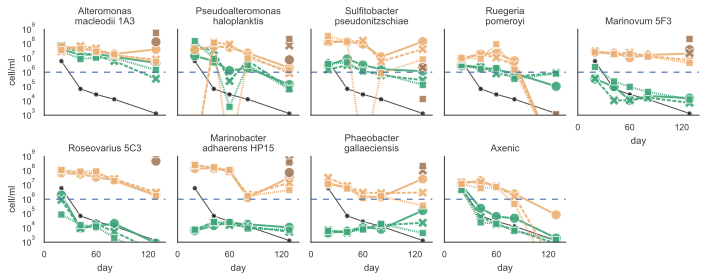

In [156]:
sns.set_context('paper')
sorder = ['med4',  'FCM', 'MPN', ]
spalette = [PCOLOR, HCOLOR, HCOLOR_dark]
g= sns.relplot(data=mmpn_df.loc[mmpn_df.variable.isin(sorder)],
    x='transfer day', y='value', hue='variable', 
            hue_order=sorder, palette=spalette,
            col='full name nl', col_wrap=5, ms=10, alpha=0.9,
            col_order=horder_nl,
            style='replicate', markers=True, lw=2,
            #units='replicate', estimator=None,
            kind='line', aspect=1, height=2,
            legend=False,
            
            #facet_kws=dict(sharey=False,),
           ).set(yscale='log', xticks=[0,60,120], ylim=(1e3,1e9), xlim=(0,140),
                 ylabel='cell/ml', xlabel='day', ).set_titles('{col_name}')
#plt.tight_layout()
for c,ax in g.axes_dict.items():
    ax.axhline(1e6, ls='--')
    sns.lineplot(
        data=mmpn_df.loc[mmpn_df.variable.isin(['med4']) & mmpn_df['full name nl'].isin(['Axenic'])],
    x='transfer day', y='value', c='black', marker="o",
        ms=5, alpha=0.7,
             lw=1,
            errorbar=None, zorder=-100, markers=True, 
            legend=False, ax=ax,
    )
plt.subplots_adjust(wspace=0.1)

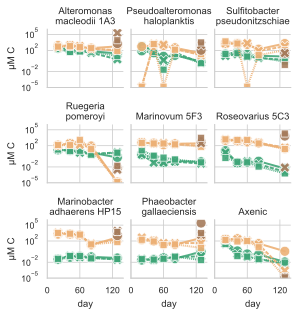

In [102]:
sns.set_context('paper')
sorder = ['Pro',  'Het (FCM)', 'Het (MPN)', ]
spalette = [PCOLOR, HCOLOR, HCOLOR_dark]
sns.relplot(data=mmpn_df.loc[mmpn_df.Strain.isin(sorder)],
    x='transfer day', y='value', hue='Strain', 
            hue_order=sorder, palette=spalette,
            col='full name nl', col_wrap=3, ms=10, alpha=0.9,
            col_order=horder_nl,
            style='replicate', markers=True, lw=2,
            #units='replicate', estimator=None,
            kind='line', aspect=1, height=1.5,
            legend=False,
            
            #facet_kws=dict(sharey=False,),
           ).set(yscale='log', xticks=[0,60,120], ylabel='µM C', xlabel='day', yticks=[1e-5, 1e-2, 1e2, 1e5]).set_titles('{col_name}')
#plt.tight_layout()
plt.subplots_adjust(wspace=0.1)

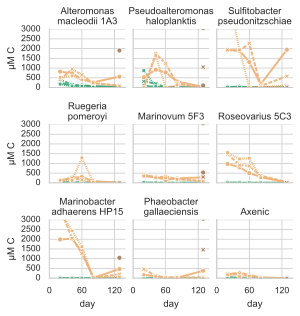

In [103]:
sns.set_context('paper')
sorder = ['Pro',  'Het (FCM)', 'Het (MPN)', ]
spalette = [PCOLOR, HCOLOR, HCOLOR_dark]
sns.relplot(data=mmpn_df.loc[mmpn_df.Strain.isin(sorder)],
    x='transfer day', y='value', hue='Strain', 
            hue_order=sorder, palette=spalette,
            col='full name nl', col_wrap=3, ms=5, alpha=0.9,
            col_order=horder_nl,
            style='replicate', markers=True, lw=2,
            #units='replicate', estimator=None,
            kind='line', aspect=1, height=1.5,
            legend=False,
            
            #facet_kws=dict(sharey=False,),
           ).set(xticks=[0,60,120], ylabel='µM C', xlabel='day', ylim=(0,3000)).set_titles('{col_name}')
#plt.tight_layout()
plt.subplots_adjust(wspace=0.1)

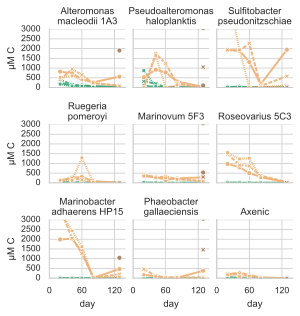

In [104]:
sns.set_context('paper')
sorder = ['Pro',  'Het (FCM)', 'Het (MPN)', ]
spalette = [PCOLOR, HCOLOR, HCOLOR_dark]
sns.relplot(data=mmpn_df.loc[mmpn_df.Strain.isin(sorder)],
    x='transfer day', y='value', hue='Strain', 
            hue_order=sorder, palette=spalette,
            col='full name nl', col_wrap=3, ms=5, alpha=0.9,
            col_order=horder_nl,
            style='replicate', markers=True, lw=2,
            #units='replicate', estimator=None,
            kind='line', aspect=1, height=1.5,
            legend=False,
            
            #facet_kws=dict(sharey=False,),
           ).set(xticks=[0,60,120], ylabel='µM C', xlabel='day', ylim=(0,3000)).set_titles('{col_name}')
#plt.tight_layout()
plt.subplots_adjust(wspace=0.1)

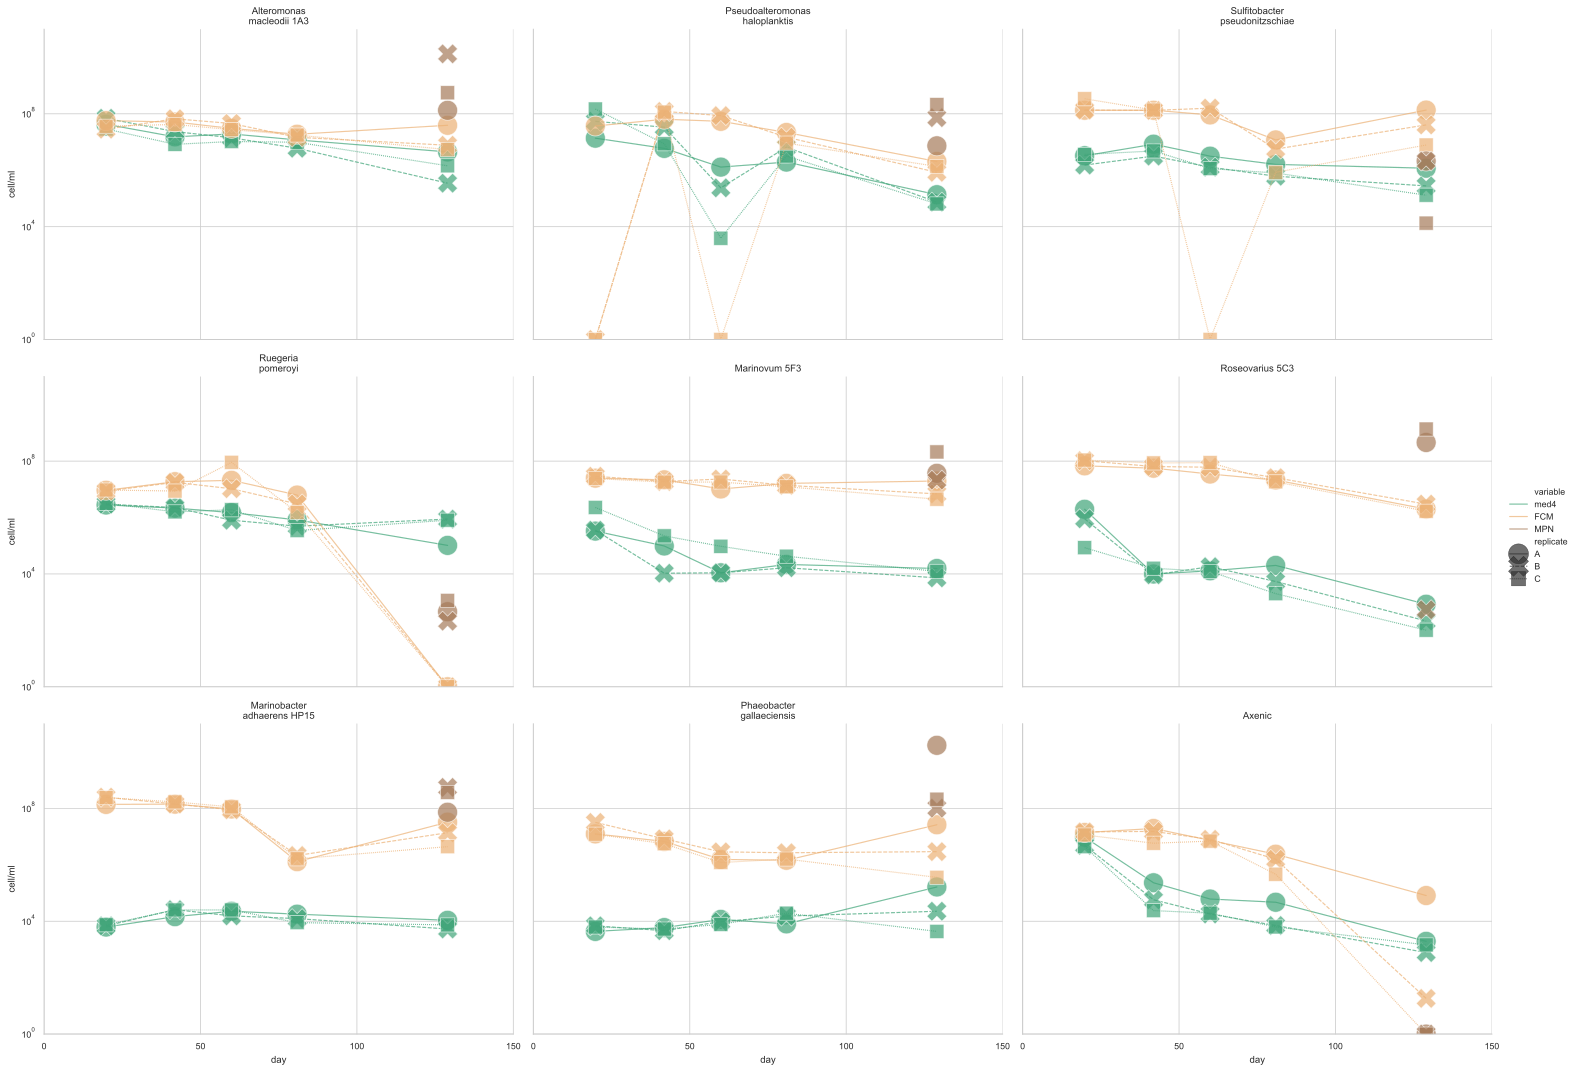

In [105]:
sorder = ['med4',  'FCM', 'MPN', ]
spalette = [PCOLOR, HCOLOR, HCOLOR_dark]
sns.relplot(data=mmpn_df.loc[mmpn_df.variable.isin(sorder)],
    x='transfer day', y='value', hue='variable', 
            hue_order=sorder, palette=spalette,
            col='full name nl', col_wrap=3, ms=20, alpha=0.7,
            col_order=horder_nl,
            style='replicate', markers=True,
            #units='replicate', estimator=None,
            kind='line', aspect=1.4,
            #facet_kws=dict(sharey=False,),
           ).set(yscale='log', xticks=[0,50,100,150], ylabel='cell/ml', xlabel='day', 
                 yticks=[1e0, 1e4, 1e8],
                ).set_titles('{col_name}')


In [106]:
mpn_df.loc[mpn_df.Group.isin(['Axenic'])][['FCM', 'med4']]

,FCM,med4
0,1.400599e+07,9.581642e+06
1,1.944269e+07,2.314324e+05
2,NaN,6.140918e+04
3,2.383222e+06,4.728488e+04
4,8.169277e+04,1.939249e+03
5,1.473072e+07,4.938495e+06
6,1.536485e+07,5.769231e+04
7,8.019702e+06,1.809955e+04
8,1.584405e+06,7.073239e+03
9,1.840175e+01,7.780937e+02


In [107]:
pro99_mdf = pro99_mdf.rename(columns={'Day': 'day'})

In [108]:
pro99_mdf['Group'] = 'Axenic_PRO99'
pro99_mdf['id'] = 'Axenic_PRO99'


In [109]:
pro99_mdf.columns

Index(['Date', 'day', 'Sample', 'FL', 'Group', 'full name', 'predicted',
       'ref_Bp[N]', 'ref_Bp[C]', 'id'],
      dtype='object')

In [110]:
#pmdf['LOD'] = pmdf.FL <= 0.05

In [111]:
pd.concat([mdf.loc[mdf.transfer.isin([0])], pro99_mdf])

,day,Sample,FL,id,replicate,transfer,heterotroph,full name,date,transfer day,Group,FL_clip,predicted,ref_Bp[N],ref_Bp[C],Date
0,0.000000,1A0,0.122,1,A,0.0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,0.122,3.204247e+06,2.860934,18.953691,NaT
1,1.081944,1A0,0.034,1,A,0.0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,0.040,8.929867e+05,0.797310,5.282176,NaT
2,2.164583,1A0,0.159,1,A,0.0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,0.159,4.176026e+06,3.728595,24.701941,NaT
3,2.747222,1A0,0.227,1,A,0.0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,0.227,5.962000e+06,5.323214,35.266293,NaT
4,3.754167,1A0,0.306,1,A,0.0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,0.306,8.036881e+06,7.175786,47.539584,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,80.062500,Pro99_axenicC,0.105,Axenic_PRO99,NaN,NaN,NaN,Axenic_PRO99,NaT,NaN,Axenic_PRO99,NaN,2.757753e+06,2.462280,16.312603,2023-03-30 15:00:00
170,83.930556,Pro99_axenicC,0.129,Axenic_PRO99,NaN,NaN,NaN,Axenic_PRO99,NaT,NaN,Axenic_PRO99,NaN,3.388097e+06,3.025086,20.041197,2023-04-03 11:50:00
171,85.796528,Pro99_axenicC,0.096,Axenic_PRO99,NaN,NaN,NaN,Axenic_PRO99,NaT,NaN,Axenic_PRO99,NaN,2.521374e+06,2.251227,14.914379,2023-04-05 08:37:00
172,91.922222,Pro99_axenicC,0.100,Axenic_PRO99,NaN,NaN,NaN,Axenic_PRO99,NaT,NaN,Axenic_PRO99,NaN,2.626432e+06,2.345028,15.535812,2023-04-11 11:38:00


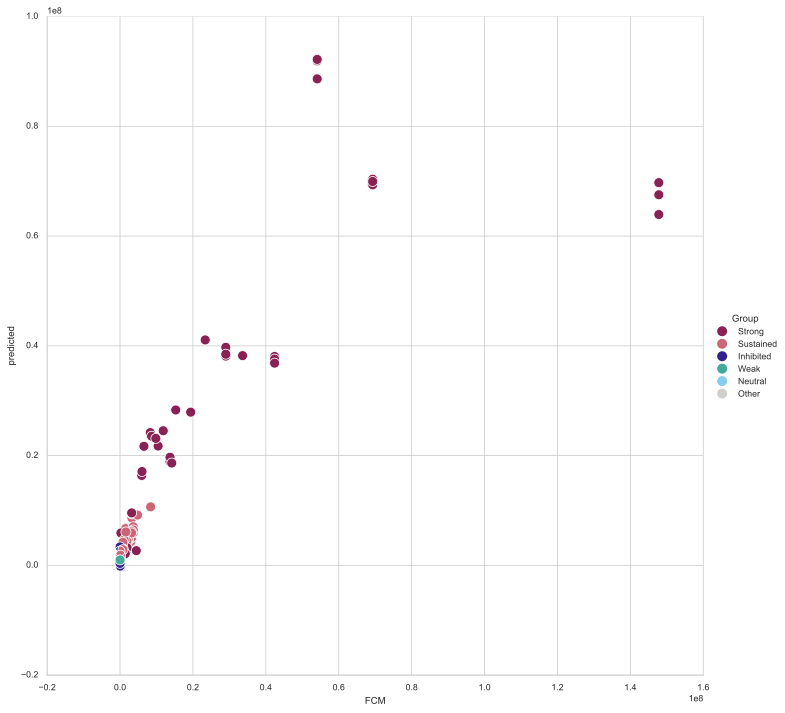

In [112]:
sns.relplot(data=train_df, x='FCM', y='predicted', #s=100, 
           height=10,
           hue='Group', palette=gpalette, hue_order=gorder,
            s=100,
          #  hue='Group'
          )

#sns.lineplot(data=train_df, x='FCM', y='predicted', color='r', legend=False)
#plt.xscale('log')
#plt.yscale('log')

In [113]:
mdf['t'] = mdf['day'] * 3600 * 24

In [114]:
pro99_mdf['t'] = pro99_mdf['day'] * 3600 * 24

In [115]:
mdf.head()

,day,Sample,FL,id,replicate,transfer,heterotroph,full name,date,transfer day,Group,FL_clip,predicted,ref_Bp[N],ref_Bp[C],t
0,0.000000,1A0,0.122,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,0.122,3.204247e+06,2.860934,18.953691,0.0
1,1.081944,1A0,0.034,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,0.040,8.929867e+05,0.797310,5.282176,93480.0
2,2.164583,1A0,0.159,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,0.159,4.176026e+06,3.728595,24.701941,187020.0
3,2.747222,1A0,0.227,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,0.227,5.962000e+06,5.323214,35.266293,237360.0
4,3.754167,1A0,0.306,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.0,Axenic,0.306,8.036881e+06,7.175786,47.539584,324360.0


In [116]:
mdf.columns

Index(['day', 'Sample', 'FL', 'id', 'replicate', 'transfer', 'heterotroph',
       'full name', 'date', 'transfer day', 'Group', 'FL_clip', 'predicted',
       'ref_Bp[N]', 'ref_Bp[C]', 't'],
      dtype='object')

In [117]:
pmdf = mdf.groupby([ 'Sample', 'id', 'replicate', 'transfer', 'transfer day', 'heterotroph',
       'full name', 'Group','t','day',])[['FL', 'ref_Bp[N]','ref_Bp[C]',]].mean().reset_index()



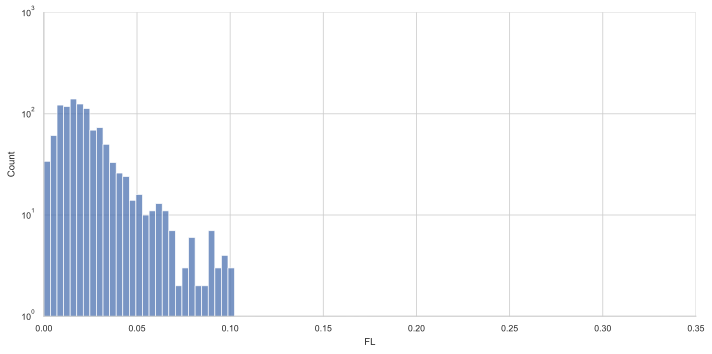

In [118]:
sns.displot(
    mdf.groupby([ 'Sample', 'id', 'replicate', 'transfer', 'transfer day', 'heterotroph',
       'full name', 'Group','t','day',])['FL'].std().dropna(),
    aspect=2,
)
plt.yscale('log')


In [119]:
error_df = mdf.groupby([ 'Sample', 'id','transfer',
   'full name', 'Group','day',])['FL'].agg(['max', 'min',lambda x: x.max() - x.min()])

#error_df.loc[error_df>0].describe()
error_df.nlargest(n=30, columns='<lambda_0>')
#error_df.describe()

max  \
Sample id transfer full name                      Group     day                
2B0    2  0        A. macleodii 1A3               Strong    34.770833  3.294   
                                                            18.711806  3.040   
5C0    5  0        Pseudoalteromonas haloplanktis Strong    16.727083  5.273   
                                                            19.711111  2.655   
5B0    5  0        Pseudoalteromonas haloplanktis Strong    31.818056  1.835   
                                                            20.778472  4.563   
                                                            21.880556  5.350   
2A0    2  0        A. macleodii 1A3               Strong    37.788889  4.467   
7B1    7  1        Sulfitobacter pseudonitzschiae Sustained 12.006944  1.272   
1A0    1  0        Axenic                         Axenic    6.731944   1.586   
1C0    1  0        Axenic                         Axenic    9.745833   1.678   
2B0    2  0        A. macleodii 1A3               Strong    21.880556  1.906   
1A0    1  0        Axenic                         Axenic    9.745833   1.701   
                                                            10.834722  1.078   
2A0    2  0        A. macleodii 1A3               Strong    21.880556  1.768   
5B0    5  0        Pseudoalteromonas haloplanktis Strong    26.747222  2.933   
5C0    5  0        Pseudoalteromonas haloplanktis Strong    17.727083  5.314   
2B0    2  0        A. macleodii 1A3               Strong    31.818056  1.296   
2A1    2  1        A. macleodii 1A3               Strong    6.935417   1.033   
2A0    2  0        A. macleodii 1A3               Strong    26.747222  1.599   
                                                            20.778472  2.298   
5C0    5  0        Pseudoalteromonas haloplanktis Strong    23.898611  1.513   
2C1    2  1        A. macleodii 1A3               Strong    8.040278   0.627   
2A0    2  0        A. macleodii 1A3               Strong    16.727083  1.908   
5C1    5  1        Pseudoalteromonas haloplanktis Strong    4.087500   2.647   
7C1    7  1        Sulfitobacter pseudonitzschiae Sustained 12.006944  1.434   
5C0    5  0        Pseudoalteromonas haloplanktis Strong    37.788889  1.290   
2A0    2  0        A. macleodii 1A3               Strong    25.734722  1.566   
                                                            27.852778  1.445   
2B0    2  0        A. macleodii 1A3               Strong    16.727083  2.904   

                                                                         min  \
Sample id transfer full name                      Group     day                
2B0    2  0        A. macleodii 1A3               Strong    34.770833  2.702   
                                                            18.711806  2.713   
5C0    5  0        Pseudoalteromonas haloplanktis Strong    16.727083  4.953   
                                                            19.711111  2.434   
5B0    5  0        Pseudoalteromonas haloplanktis Strong    31.818056  1.624   
                                                            20.778472  4.367   
                                                            21.880556  5.154   
2A0    2  0        A. macleodii 1A3               Strong    37.788889  4.273   
7B1    7  1        Sulfitobacter pseudonitzschiae Sustained 12.006944  1.079   
1A0    1  0        Axenic                         Axenic    6.731944   1.394   
1C0    1  0        Axenic                         Axenic    9.745833   1.491   
2B0    2  0        A. macleodii 1A3               Strong    21.880556  1.720   
1A0    1  0        Axenic                         Axenic    9.745833   1.516   
                                                            10.834722  0.896   
2A0    2  0        A. macleodii 1A3               Strong    21.880556  1.586   
5B0    5  0        Pseudoalteromonas haloplanktis Strong    26.747222  2.752   
5C0    5  0        Pseudoalteromonas haloplanktis Strong    17.727083  5

In [120]:
error_df = mdf.groupby([ 'Sample', 'id','transfer',
   'full name', 'Group','day',])['FL'].agg(['max', 'min','std',lambda x: x.max() - x.min()])

#error_df.loc[error_df>0].describe()
error_df.nlargest(n=30, columns='<lambda_0>')
#error_df.describe()

max  \
Sample id transfer full name                      Group     day                
2B0    2  0        A. macleodii 1A3               Strong    34.770833  3.294   
                                                            18.711806  3.040   
5C0    5  0        Pseudoalteromonas haloplanktis Strong    16.727083  5.273   
                                                            19.711111  2.655   
5B0    5  0        Pseudoalteromonas haloplanktis Strong    31.818056  1.835   
                                                            20.778472  4.563   
                                                            21.880556  5.350   
2A0    2  0        A. macleodii 1A3               Strong    37.788889  4.467   
7B1    7  1        Sulfitobacter pseudonitzschiae Sustained 12.006944  1.272   
1A0    1  0        Axenic                         Axenic    6.731944   1.586   
1C0    1  0        Axenic                         Axenic    9.745833   1.678   
2B0    2  0        A. macleodii 1A3               Strong    21.880556  1.906   
1A0    1  0        Axenic                         Axenic    9.745833   1.701   
                                                            10.834722  1.078   
2A0    2  0        A. macleodii 1A3               Strong    21.880556  1.768   
5B0    5  0        Pseudoalteromonas haloplanktis Strong    26.747222  2.933   
5C0    5  0        Pseudoalteromonas haloplanktis Strong    17.727083  5.314   
2B0    2  0        A. macleodii 1A3               Strong    31.818056  1.296   
2A1    2  1        A. macleodii 1A3               Strong    6.935417   1.033   
2A0    2  0        A. macleodii 1A3               Strong    26.747222  1.599   
                                                            20.778472  2.298   
5C0    5  0        Pseudoalteromonas haloplanktis Strong    23.898611  1.513   
2C1    2  1        A. macleodii 1A3               Strong    8.040278   0.627   
2A0    2  0        A. macleodii 1A3               Strong    16.727083  1.908   
5C1    5  1        Pseudoalteromonas haloplanktis Strong    4.087500   2.647   
7C1    7  1        Sulfitobacter pseudonitzschiae Sustained 12.006944  1.434   
5C0    5  0        Pseudoalteromonas haloplanktis Strong    37.788889  1.290   
2A0    2  0        A. macleodii 1A3               Strong    25.734722  1.566   
                                                            27.852778  1.445   
2B0    2  0        A. macleodii 1A3               Strong    16.727083  2.904   

                                                                         min  \
Sample id transfer full name                      Group     day                
2B0    2  0        A. macleodii 1A3               Strong    34.770833  2.702   
                                                            18.711806  2.713   
5C0    5  0        Pseudoalteromonas haloplanktis Strong    16.727083  4.953   
                                                            19.711111  2.434   
5B0    5  0        Pseudoalteromonas haloplanktis Strong    31.818056  1.624   
                                                            20.778472  4.367   
                                                            21.880556  5.154   
2A0    2  0        A. macleodii 1A3               Strong    37.788889  4.273   
7B1    7  1        Sulfitobacter pseudonitzschiae Sustained 12.006944  1.079   
1A0    1  0        Axenic                         Axenic    6.731944   1.394   
1C0    1  0        Axenic                         Axenic    9.745833   1.491   
2B0    2  0        A. macleodii 1A3               Strong    21.880556  1.720   
1A0    1  0        Axenic                         Axenic    9.745833   1.516   
                                                            10.834722  0.896   
2A0    2  0        A. macleodii 1A3               Strong    21.880556  1.586   
5B0    5  0        Pseudoalteromonas haloplanktis Strong    26.747222  2.752   
5C0    5  0        Pseudoalteromonas haloplanktis Strong    17.727083  5

In [121]:
error_df = mdf.groupby([ 'Sample', 'id','transfer',
   'full name', 'Group','day',])['FL'].agg(['max', 'min',lambda x: x.max() - x.min()])

#error_df.loc[error_df>0].describe()
error_df.loc[error_df['<lambda_0>']!=0].nsmallest(n=30, columns='max')
#error_df.describe()

,,,,,,max,min,<lambda_0>
Sample,id,transfer,full name,Group,day,,,
1C1,1,1,Axenic,Axenic,12.968056,0.000,-0.038,0.038
9C1,9,1,E. coli,nan,6.935417,0.005,0.000,0.005
1A1,1,1,Axenic,Axenic,14.961806,0.009,0.000,0.009
3A1,3,1,Marinobacter adhaerens HP15,Inhibited,6.935417,0.009,-0.005,0.014
4A0,4,0,Phaeobacter gallaeciensis,Inhibited,34.770833,0.009,-0.005,0.014
4C1,4,1,Phaeobacter gallaeciensis,Inhibited,4.087500,0.009,0.000,0.009
9C1,9,1,E. coli,nan,12.006944,0.009,0.005,0.004
10B1,10,1,Marinovum 5F3,Weak,5.911806,0.010,0.005,0.005
10B0,10,0,Marinovum 5F3,Weak,37.788889,0.014,0.009,0.005


In [122]:
# some samples were dropped midway
problematic_samples = pmdf.loc[pmdf.isna().any(axis=1), 'Sample'].unique()
pmdf = pmdf.loc[~pmdf.Sample.isin(problematic_samples)]
pmdf.loc[pmdf.isna().any(axis=1)]


,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C]


In [123]:
problematic_samples

array(['10A1', '10B1', '10C1', '11A1', '11B1', '11C1', '7A1', '7B1',
       '7C1', '8A0', '8A1', '8A2', '8B0', '8B1', '8B2', '8C0', '8C1',
       '8C2', '9A1', '9B1', '9C1'], dtype=object)

In [124]:
pmdf.loc[pmdf.Sample.isin(problematic_samples)]

,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C]


In [125]:
pmdf

,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C]
0,10A0,10,A,0,0.000000,HOT5_F3,Marinovum 5F3,Weak,0.0,0.000000,0.061,1.430467,9.476845
1,10A0,10,A,0,0.000000,HOT5_F3,Marinovum 5F3,Weak,93480.0,1.081944,0.088,2.063625,13.671514
2,10A0,10,A,0,0.000000,HOT5_F3,Marinovum 5F3,Weak,187020.0,2.164583,0.121,2.837484,18.798332
3,10A0,10,A,0,0.000000,HOT5_F3,Marinovum 5F3,Weak,237360.0,2.747222,0.189,4.432103,29.362685
4,10A0,10,A,0,0.000000,HOT5_F3,Marinovum 5F3,Weak,324360.0,3.754167,0.275,6.448828,42.723483
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7384,9C5,9,C,5,128.984028,k-12,E. coli,nan,4228200.0,48.937500,0.015,0.351754,2.330372
7385,9C5,9,C,5,128.984028,k-12,E. coli,nan,4476660.0,51.813194,-0.014,-0.328304,-2.175014
7386,9C5,9,C,5,128.984028,k-12,E. coli,nan,4560540.0,52.784028,-0.028,-0.656608,-4.350027
7387,9C5,9,C,5,128.984028,k-12,E. coli,nan,5179500.0,59.947917,-0.014,-0.328304,-2.175014


In [126]:
#uncomment to recreate

# pmdf.loc[pmdf.transfer.isin([0]) & ~pmdf.id.isin([8])].to_excel('reference_10cc.xlsx', index=False)


In [127]:
#uncomment to recreate
#pmdf.loc[~pmdf.id.isin([8])].to_excel('reference_10cc_all.xlsx', index=False)


In [128]:
pmdf.loc[mdf.transfer.isin([0]) & ~pmdf.id.isin([8])].groupby(['Sample', 't']).size().sort_values()

Sample  t           
5C0     8.704080e+06    1
        9.306540e+06    1
        9.585540e+06    1
        1.000908e+07    1
        1.026336e+07    1
                       ..
5C1     2.505240e+06    1
        2.600040e+06    1
        2.761560e+06    1
        2.867460e+06    1
10A0    0.000000e+00    1
Length: 3672, dtype: int64

In [129]:
#uncomment to recreate
#pro99_mdf.to_excel('reference_pro99_axenic.xlsx', index=False)


In [130]:
#uncomment to recreate
#pmdf.loc[pmdf.transfer.isin([0]) & pmdf.id.isin([1])].to_excel('reference_10cc_axenic.xlsx', index=False)


In [131]:
from scipy import integrate
def _integrate_column(x, collist):
    return pd.Series({colname :  integrate.simpson(x[colname], x=x['t']) / (x['t'].max()) for colname in collist})


In [132]:
gorder1

['Strong', 'Sustained', 'Inhibited', 'Weak', 'Axenic']

In [133]:
idvars = ['Sample', 'id', 'replicate', 'full name', 'Group', ]
collist = ['ref_Bp[N]', 'ref_Bp[C]']
total_gross_uptake = pmdf.loc[pmdf.transfer.isin([0]) & ~pmdf.id.isin([8]) & pmdf.Group.isin(gorder1[:-1])].groupby(idvars).apply(lambda x: _integrate_column(x, collist))


In [134]:
total_gross_uptake.rename(columns={
    'ref_Bp[N]': 'Pro Biomass [µM N]',
    'ref_Bp[C]': 'Pro Biomass [µM C]',
}, inplace=True)
total_gross_uptake = total_gross_uptake.reset_index()
total_gross_uptake

,Sample,id,replicate,full name,Group,Pro Biomass [µM N],Pro Biomass [µM C]
0,10A0,10,A,Marinovum 5F3,Weak,1.017953,6.743938
1,10B0,10,B,Marinovum 5F3,Weak,1.010502,6.694579
2,10C0,10,C,Marinovum 5F3,Weak,2.287270,15.153164
3,11A0,11,A,Roseovarius 5C3,Weak,1.920647,12.724286
4,11B0,11,B,Roseovarius 5C3,Weak,1.452392,9.622098
5,11C0,11,C,Roseovarius 5C3,Weak,1.184246,7.845629
6,2A0,2,A,A. macleodii 1A3,Strong,16.144219,106.955450
7,2B0,2,B,A. macleodii 1A3,Strong,16.834547,111.528876
8,2C0,2,C,A. macleodii 1A3,Strong,13.544305,89.731022
9,3A0,3,A,Marinobacter adhaerens HP15,Inhibited,1.797387,11.907688


In [135]:
gorder1

['Strong', 'Sustained', 'Inhibited', 'Weak', 'Axenic']

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Strong vs. Sustained: t-test independent samples with Benjamini-Hochberg correction, P_val:1.118e-04 t=6.126e+00
Weak vs. Inhibited: t-test independent samples with Benjamini-Hochberg correction, P_val:5.304e-01 t=6.499e-01
Sustained vs. Weak: t-test independent samples with Benjamini-Hochberg correction, P_val:8.754e-04 t=4.674e+00
Strong vs. Weak: t-test independent samples with Benjamini-Hochberg correction, P_val:6.577e-06 t=8.546e+00
Sustained vs. Inhibited: t-test independent samples with Benjamini-Hochberg correction, P_val:6.511e-04 t=4.871e+00
Strong vs. Inhibited: t-test independent samples with Benjamini-Hochberg correction, P_val:5.934e-06 t=8.645e+00


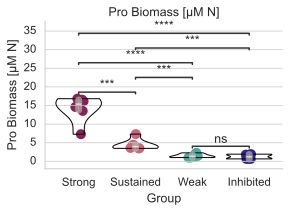

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Strong vs. Sustained: t-test independent samples with Benjamini-Hochberg correction, P_val:1.118e-04 t=6.126e+00
Weak vs. Inhibited: t-test independent samples with Benjamini-Hochberg correction, P_val:5.304e-01 t=6.499e-01
Sustained vs. Weak: t-test independent samples with Benjamini-Hochberg correction, P_val:8.754e-04 t=4.674e+00
Strong vs. Weak: t-test independent samples with Benjamini-Hochberg correction, P_val:6.577e-06 t=8.546e+00
Sustained vs. Inhibited: t-test independent samples with Benjamini-Hochberg correction, P_val:6.511e-04 t=4.871e+00
Strong vs. Inhibited: t-test independent samples with Benjamini-Hochberg correction, P_val:5.934e-06 t=8.645e+00


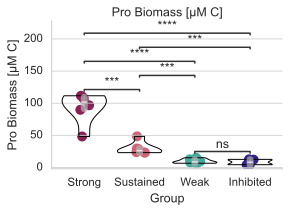

In [136]:
sns.set_context('paper', font_scale=1.3)

for c in ['Pro Biomass [µM N]', 'Pro Biomass [µM C]',]:
    g = sns.catplot(
        data=total_gross_uptake,
         y=c, 
        hue='Group', hue_order=gorder1[:-1], 
        #palette=gpalette1,
        palette=['black','black','black','black',],
        x='Group', order=['Strong', 'Sustained', 'Weak', 'Inhibited', ],
        kind='violin', #split=True,
        aspect=1.4,
        linewidth=1, 
        height=3,
        #size=4, dodge=True, jitter=0.5,
        #split=True,
        common_norm=False, cut=0, density_norm='width',
        fill=None,
        #inner='quart',
         inner_kws=dict(box_width=7, whis_width=1, color=".7", linewidth=0.5, alpha=0.7),
        #log_scale=True,
         #inner_kws=dict( box_width=5, color=".7", ),
        linecolor='grey',
        legend=False,
    )
    sns.stripplot(
        data=total_gross_uptake,
         y=c, 
        hue='Group', hue_order=gorder1, palette=gpalette1,
        x='Group', order=['Strong', 'Sustained', 'Weak', 'Inhibited', ],
        size=10, dodge=False,  zorder=-100,
        legend=False,
    )
    if c == 'Pro Biomass [µM N]':
        g.set(ylim=(-2,20), )
    else:
        g.set(ylim=(-2,120), )

    ax =plt.gca()
    annot = Annotator(
        ax, [
            ('Strong', 'Sustained'), 
             ('Weak', 'Inhibited'), 
            ('Strong', 'Weak'), 
            ('Strong', 'Inhibited'), 
            ('Sustained', 'Weak'), 
            ('Sustained', 'Inhibited'), 
        ],
        data=total_gross_uptake,
        y=c, x='Group', order=['Strong', 'Sustained', 'Weak', 'Inhibited', ],)

    annot.configure(
        test='t-test_ind', 
        comparisons_correction="BH", correction_format="replace", 
        text_format='star', loc='inside', verbose=2)
    annot.apply_test()
    ax, test_results = annot.annotate()

    #g.set(ylabel=stage)
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    #plt.axhline(1,lw=1, ls='--')
    plt.title(c)
    plt.show()

In [137]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

total_gross_uptake['Nbiomass'] = total_gross_uptake['Pro Biomass [µM N]']
# Conduct one-way ANOVA
model = ols('Nbiomass ~ C(Group)', data=total_gross_uptake).fit()

anova_table = sm.stats.anova_lm(model, typ=1)  # Type 1 ANOVA DataFrame
print(anova_table)
# Conduct Tukey's test
tukey = pairwise_tukeyhsd(endog=total_gross_uptake['Nbiomass'], groups=total_gross_uptake['Group'], alpha=0.05)
print(tukey)

            df      sum_sq     mean_sq          F        PR(>F)
C(Group)   3.0  661.432485  220.477495  55.832378  6.705284e-10
Residual  20.0   78.978365    3.948918        NaN           NaN
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower    upper  reject
-----------------------------------------------------------
Inhibited    Strong  12.9072    0.0    9.696 16.1185   True
Inhibited Sustained    3.191 0.0518  -0.0203  6.4022  False
Inhibited      Weak   0.2223 0.9973  -2.9889  3.4336  False
   Strong Sustained  -9.7163    0.0 -12.9275 -6.5051   True
   Strong      Weak -12.6849    0.0 -15.8962 -9.4737   True
Sustained      Weak  -2.9686 0.0764  -6.1799  0.2426  False
-----------------------------------------------------------


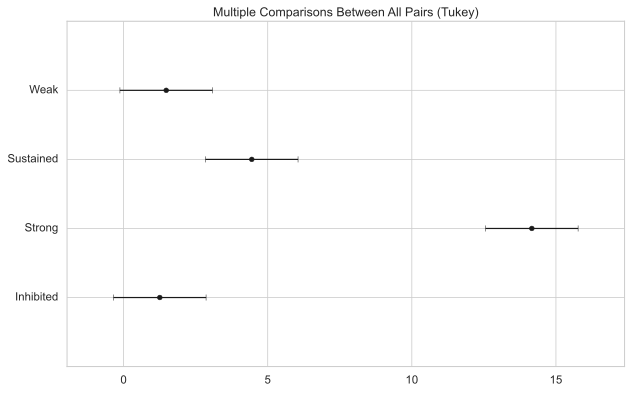

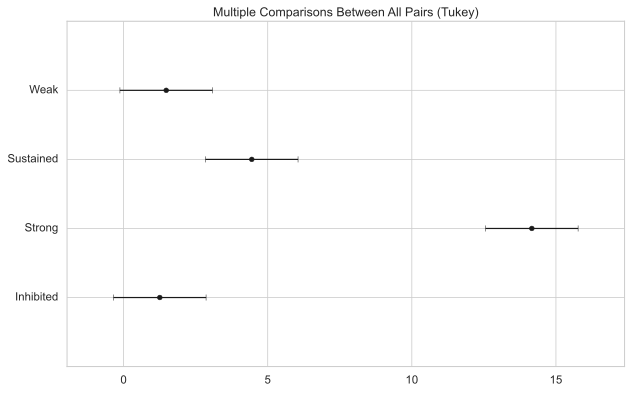

In [138]:
tukey.plot_simultaneous()

In [ ]:
mdf

In [ ]:
pmdf.groupby('transfer day').day.max()

# additional data sets

## Yara

In [ ]:
xlsx_fname = 'data/Growth curves A-D Yara.xlsx'
y = pd.read_excel(xlsx_fname, sheet_name=None, index_col=[0,1,2], header=None)

In [ ]:
def _process(k,d):
    df = d.T
    id_vars = [i for i in df.columns if i[2] in ['Day', 'Date']]
    mdf = df.melt(id_vars=id_vars, var_name=['Sample', 'strain', 'media'], value_name='FL'
                 ).rename(columns={i : i[2] for i in id_vars})
    mdf['sheet_name'] = k
    
    return mdf

yara_df = pd.concat([_process(k, y[k]) for k in y])
yara_df = yara_df.rename(columns={'Day': 'day'})
yara_df['group_sample'] = (yara_df['sheet_name'] + (yara_df['Sample']).astype('string')).astype('object')

In [ ]:
gmap = {  '(-) Pro99': 'Pro99',
       '(-) lowN' : 'lowN', '(-) lowP 1:8' : 'lowP(1:8)', '(-) lowP 1:50' :  'lowP(1:50)', }
for i,j in gmap.items():
    yara_df.loc[yara_df.media.isin([i]), 'media'] = j

In [ ]:
yara_df = yara_df.reset_index(drop=True)

In [ ]:
problematic_samples_yara = yara_df.loc[yara_df.isna().any(axis=1), 'group_sample'].unique()
problematic_samples_yara

In [ ]:
yara_df

In [ ]:
yara_df.dropna(axis=0, subset='FL', inplace=True)

In [ ]:
yara_df.columns

In [ ]:
yara_df['Sample_prev'] = yara_df['Sample']
yara_df['Sample'] = (
    'Ax_Media_'+
    yara_df.sheet_name.str.replace('SetUp- Group', '', regex=False).replace('SetUp-GroupA','A', regex=False).str.strip() + 
    yara_df.Sample.astype(int).astype(str))

In [ ]:
yara_df.Sample.value_counts().value_counts()

In [ ]:
yara_df.head()

In [ ]:
yara_df.dtypes

In [ ]:
yara_df['id'] = yara_df['strain'].astype(str) + '_' +  yara_df['media']

In [ ]:
yara_df['id'].unique()

In [ ]:
yara_df['Sample'].value_counts()

In [ ]:
cols = ['Sample', 'id',  'day', 'strain', 'media', 'FL', ]
yara_df = yara_df[cols].copy()
yara_df['t'] = yara_df['day'] * 3600 * 24

In [ ]:
yara_df['Group'] = 'Axenic'
yara_df.loc[~yara_df['strain'].isin(['MED4']),'Group'] = 'Axenic_Other'
yara_df.loc[~yara_df['media'].isin(['lowN']),'Group'] = 'Axenic_Other'
yara_df['full name'] = 'Axenic_' + yara_df['id']
yara_df['predicted'] = results.predict(yara_df['FL'])
yara_df['ref_Bp[N]'] = yara_df['predicted']* Qp * 1e3
yara_df['ref_Bp[C]'] = yara_df['ref_Bp[N]'] * 6.625


In [ ]:
yara_df.columns

In [ ]:
yara_df.head()

In [ ]:
yara_df.groupby(['Group', 'id','full name',  ]).size().head(50)


In [ ]:
#uncomment to recreate

# yara_df.to_excel('reference_yara_axenic.xlsx', index=False)


## 5x5

In [ ]:
ccpa_df = pd.read_pickle('data/CCPA.pkl.gz')
ccpa_df.loc[ccpa_df.PRO == 'C9B', 'PRO'] = 'MIT0604'


In [ ]:
ccpa_df['FL'] = ccpa_df['FL_orig']

In [ ]:
ccpa_df

In [ ]:
ccpa_df.columns

In [ ]:
ccpa_df.head()

In [ ]:
ccpa_df.loc[ccpa_df.FL_orig.isna()]


In [ ]:
ccpa_df['transfer'] = ccpa_df.experiment.str.replace('e', '').astype(int) 
ccpa_df.loc[ccpa_df['transfer'].isin([1]), 'transfer'] = 0
ccpa_df['transfer'].unique()

In [ ]:
ccpa_df['Sample'] = '5x5_' + ccpa_df['sample'] + ccpa_df.transfer.astype(str)
ccpa_df['Sample'].unique()

In [ ]:
ccpa_df.Sample.value_counts().value_counts()

In [ ]:
ccpa_df.dtypes

In [ ]:
ccpa_df['id'] = ccpa_df['PRO'] + '_' +  ccpa_df['ALT']

In [ ]:
ccpa_df['id'].unique()

In [ ]:
ccpa_df['Sample'].value_counts()

In [ ]:
ccpa_df.columns

In [ ]:
fullname_map = {
    '1A3'  : 'A. macleodii HOT1A3',
    'ATCC' : 'A. macleodii ATCC27126',
    'BS11' : 'A. macleodii BS11',
    'DE1'  : 'A. mediterranea AltDE1',
    'DE'   : 'A. mediterranea AltDE',
    'Ax_Pro' : 'Axenic',
    'all_Pro': 'Axenic',
    'all'    : 'Axenic',
}


In [ ]:
ccpa_df['ALT'].unique()

In [ ]:
ccpa_df[['PRO', 'ALT', 'culture', 'Sample', 'id']].value_counts()

In [ ]:
ccpa_df['Group'] = 'Axenic'
ccpa_df['full name'] = 'Axenic_' + ccpa_df['PRO']


In [ ]:
ccpa_df['culture'].unique()

In [ ]:
ccpa_df['Group'] = ccpa_df['culture'].map({
    'Co_Culture': 'Strong', 
    'Axenic' : 'Axenic',
    'All_Pro' : 'Other', 'All_strains': 'Other'
                                          })

ccpa_df['full name'] = ccpa_df['ALT'].map(fullname_map)
ccpa_df.loc[ccpa_df['Group'].isin(['Axenic']), 'full name'] = 'Axenic_' + ccpa_df.loc[ccpa_df['Group'].isin(['Axenic']),'PRO']
ccpa_df.loc[ccpa_df['Group'].isin(['Axenic']) & ccpa_df['PRO'].isin(['MED4']), 'full name'] = 'Axenic'
ccpa_df.loc[ccpa_df['Group'].isin(['Strong']) & ~ccpa_df['PRO'].isin(['MED4']), 'Group'] = 'Strong_Other'
ccpa_df.loc[ccpa_df['Group'].isin(['Axenic']) & ~ccpa_df['PRO'].isin(['MED4']), 'Group'] = 'Axenic_Other'

ccpa_df['Group'].unique(), ccpa_df['full name'].unique()

In [ ]:
ccpa_df.head()

In [ ]:
ccpa_df['predicted'] = results.predict(ccpa_df['FL'])
ccpa_df['ref_Bp[N]'] = ccpa_df['predicted']* Qp * 1e3
ccpa_df['ref_Bp[C]'] = ccpa_df['ref_Bp[N]'] * 6.625


In [ ]:
ccpa_df['t'] = ccpa_df['day'] * 3600 * 24

In [ ]:
ccpa_df = ccpa_df[[
    'Sample', 'id', 'transfer', 
     'PRO', 'ALT', 
    'full name', 'Group', 't', 'day', 'FL', 'ref_Bp[N]', 'ref_Bp[C]',
]]


In [ ]:
ccpa_df.head()

In [ ]:
ccpa_df.groupby(['Group', 'id','full name',  ]).size().head(50)


In [ ]:
#uncomment to recreate
# ccpa_df.to_excel('reference_ccpa.xlsx', index=False)
